## Fetching the Data and Imports


In [0]:
!git clone https://github.com/sergivalverde/MAIA_seminar.git
!pip install https://github.com/ANTsX/ANTsPy/releases/download/v0.1.8/antspy-0.1.7-cp36-cp36m-linux_x86_64.whl
!pip install statsmodels
!pip install segmentation-models-pytorch

import os
import random
import torch
import ants
import numpy as np
import nibabel as nib
options = {}

# training data path
options['training_path'] = 'Training_Set'

# validation data path 
options['val_path'] = 'Validation_Set'

# testing data path 
options['test_path'] = 'Test_Set'

Cloning into 'MAIA_seminar'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 67 (delta 23), reused 56 (delta 13), pack-reused 0
Unpacking objects: 100% (67/67), done.
     |████████████████████████████████| 255.7MB 64kB/s 
     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=32a1bcef3883914e1cf5be23227a1daa5af381dc278655f9bc0d6fe6a1c8cb66
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.5.1-cp36-none-any.whl size=11768 sha256=5086811de721342eceee5006f3c5351b399a76c320a72aeb922546cef782c72c
  Stored in directory: /root/.cache/pip/wheels/52/0c/8e/58d91f29f0f8cbb45231a145312939a5423dc82c61cc731361
Suc

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


In [0]:

%load_ext autoreload
%autoreload 2

file_id_gdrive = "1m_lhgn-jiNj9mXx3AO87pZ0fr4un_GVS"
!git clone https://github.com/chentinghao/download_google_drive.git
%cd download_google_drive
!python download_gdrive.py $file_id_gdrive /content/data.zip
%cd /content/
!unzip data.zip

options = {}

# training data path
options['training_path'] = 'Training_Set'

# validation data path 
options['val_path'] = 'Validation_Set'

# testing data path 
options['test_path'] = 'Test_Set'

# additional options for patch size, sampling step, normalization, etc...
options['patch_size'] = (32, 32, 32)
options['sampling_step'] = (32, 32, 32)
options['normalize'] = True 
options['batch_size'] = 32
options['verbose'] = False
options['roi'] = 'brainmask.nii.gz'
options['patience'] = 30



Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
/content/download_google_drive
20.8MB [00:00, 70.3MB/s]
/content
Archive:  data.zip
   creating: Test_Set/
   creating: Test_Set/IBSR_15/
  inflating: Test_Set/IBSR_15/IBSR_15.nii.gz  
   creating: Test_Set/IBSR_10/
  inflating: Test_Set/IBSR_10/IBSR_10.nii.gz  
   creating: Test_Set/IBSR_02/
  inflating: Test_Set/IBSR_02/IBSR_02.nii.gz  
   creating: Training_Set/
   creating: Training_Set/IBSR_05/
  inflating: Training_Set/IBSR_05/IBSR_05.nii.gz  
  inflating: Training_Set/IBSR_05/IBSR_05_seg.nii.gz  
   creating: Training_Set/IBSR_07/
  inflating: Training_Set/IBSR_07/IBSR_07_seg.nii.gz  
  inflating: Training_Set/IBSR_07/IBSR_07.nii.gz  
   creating: Training_Set/IBSR_03/
  inflating: Training_Set/IBSR_03/IBSR_03.nii.gz  
  inflating: Training_Set/IBSR_03/IBSR_03_seg.nii.gz  
   creating: Training_Set/IB

## Generating Coronal and Axial Data Directories

In [0]:
!mkdir new_data
!mkdir /content/new_data/Training_Set
!mkdir /content/new_data/Training_Set/Images
!mkdir /content/new_data/Training_Set/Masks
!mkdir /content/new_data/Validation_Set
!mkdir /content/new_data/Validation_Set/Images
!mkdir /content/new_data/Validation_Set/Masks
!mkdir /content/new_data/Validation_Set/orig

## Generating 2D Coronal Data

/content
IBSR_06.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


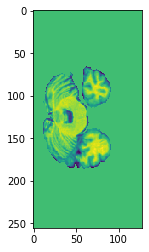

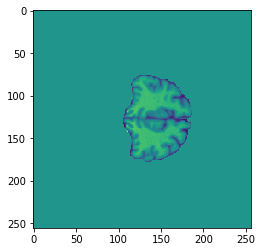

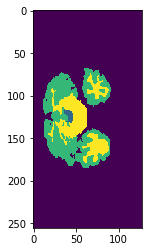

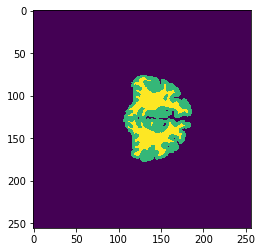

Training
IBSR_09.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


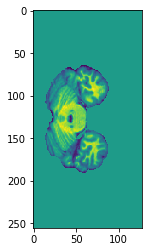

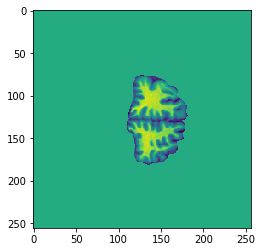

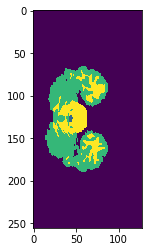

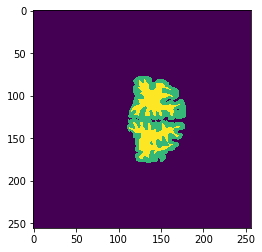

Training
IBSR_18.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


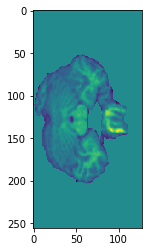

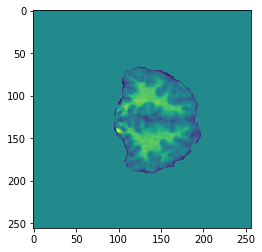

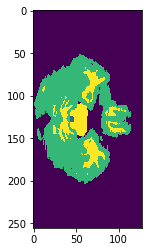

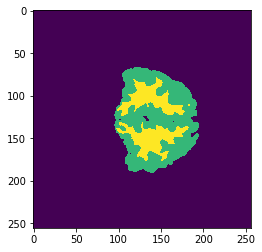

Training
IBSR_07.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


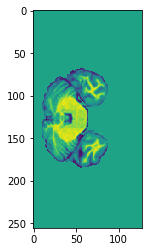

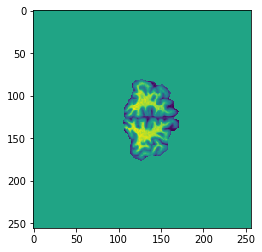

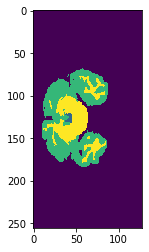

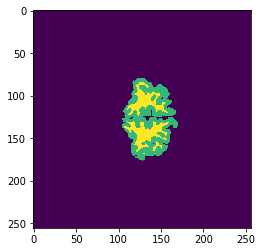

Training
IBSR_03.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


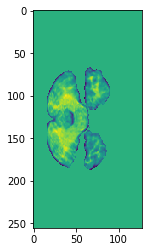

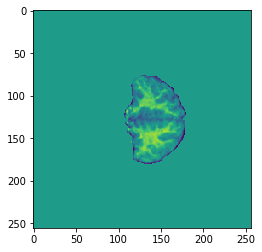

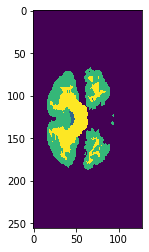

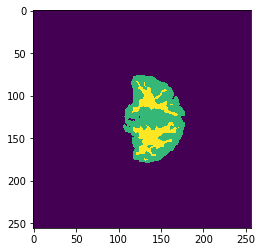

Training
IBSR_05.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


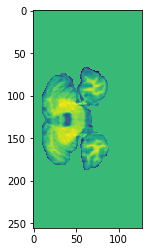

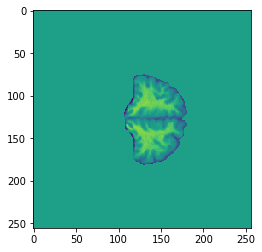

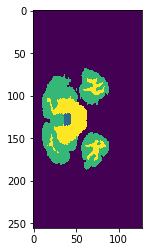

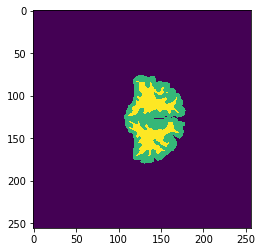

Training
IBSR_04.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


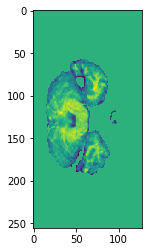

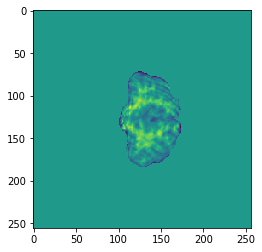

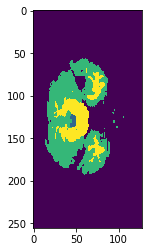

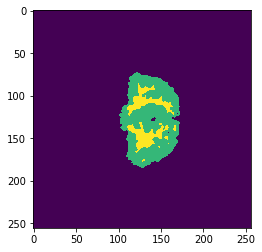

Training
IBSR_01.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


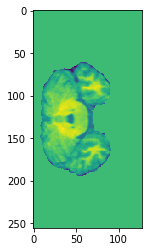

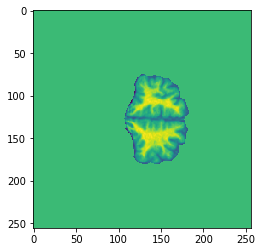

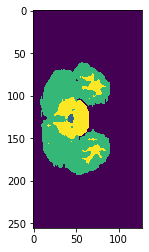

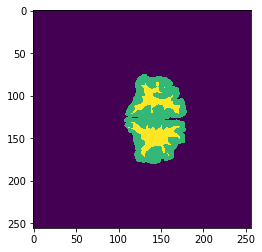

Training
IBSR_16.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


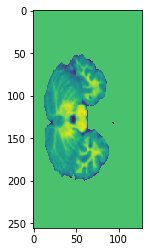

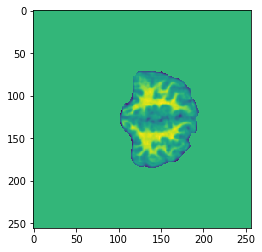

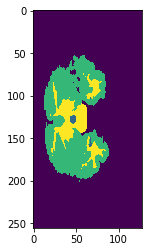

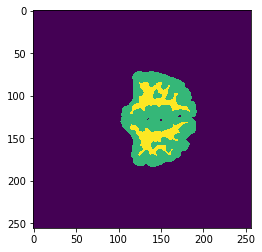

Training
IBSR_08.nii.gz
DIMENSIONS CORONAL:
(1, 256, 256, 128)


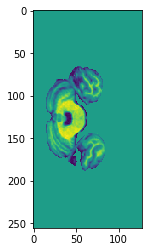

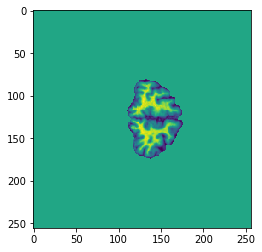

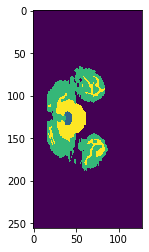

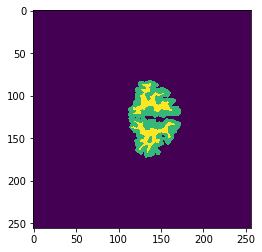

Training
IBSR_13.nii.gz
DIMENSIONS CORONAL:
(256, 256, 128)


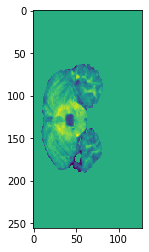

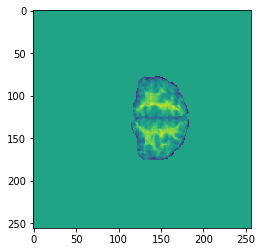

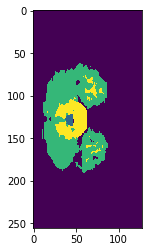

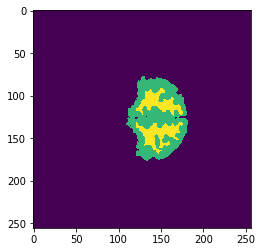

Validation
IBSR_11.nii.gz
DIMENSIONS CORONAL:
(256, 256, 128)


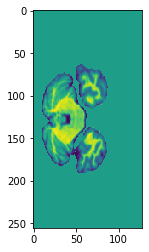

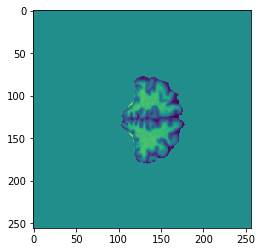

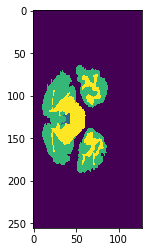

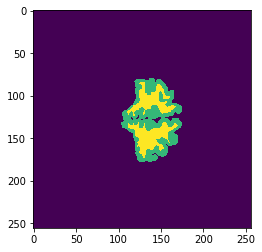

Validation
IBSR_17.nii.gz
DIMENSIONS CORONAL:
(256, 256, 128)


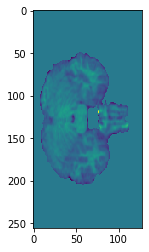

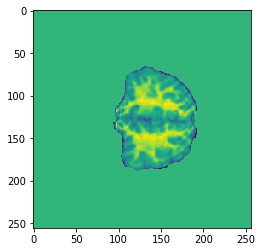

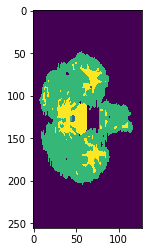

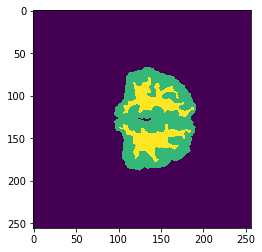

Validation
IBSR_12.nii.gz
DIMENSIONS CORONAL:
(256, 256, 128)


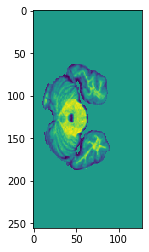

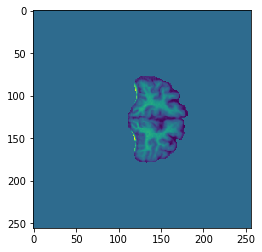

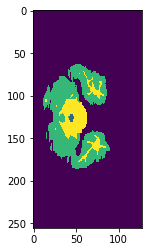

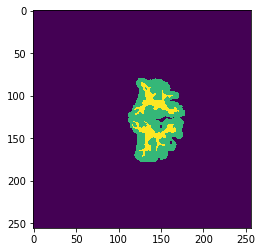

Validation
IBSR_14.nii.gz
DIMENSIONS CORONAL:
(256, 256, 128)


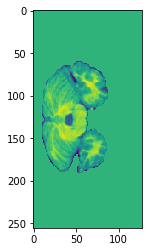

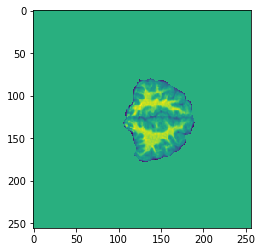

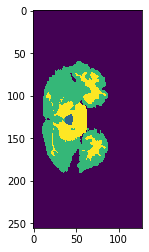

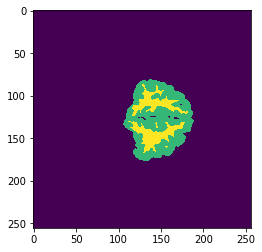

Validation


'\nfor scan_id in os.listdir(options[\'val_path\']):\n    orig_img = scan_id + ".nii.gz"\n    seg_img = scan_id + "_seg.nii.gz"\n    if(options[\'verbose\'] == True):\n      print(orig_img)\n\n    data = np.squeeze(nib.load(os.path.join(options[\'val_path\'], \n                                        scan_id, \n                                        orig_img)).get_data())\n\n    seg_data = np.squeeze(nib.load(os.path.join(options[\'val_path\'], \n                                        scan_id, \n                                        seg_img)).get_data())\n\n    axial = normalize_image(np.squeeze(data))\n\n\n\n    coronal = np.swapaxes(axial,1,2)\n    saggital = np.swapaxes(axial,0,1)\n    saggital = np.swapaxes(saggital,1,2)\n\n    if(options[\'verbose\'] == True):\n      print("DIMENSIONS BEFORE:")\n      print(axial.shape)\n      print(coronal.shape)\n      print(saggital.shape)\n\n\n    npad = ((0,256 - axial.shape[0]), (0,256 - axial.shape[1]), (0,256 - axial.shape[2]))\n    ax

In [0]:
import matplotlib.pyplot as plt
import numpy.ma as ma

%cd /content
options['verbose'] = True

def normalize_image(im):
  im_mask = (im > 0);
  im_compressed_region = ma.array(im,mask=~im_mask).compressed()
  
  if (im_compressed_region.size == 0):
    return im
  else:
    avg = np.mean(im_compressed_region,dtype='float32')
    std = np.std(im_compressed_region,dtype='float32')
    return (ma.array(im,mask=~im_mask)-avg)/std

# Training - Images 
for scan_id in os.listdir(options['training_path']):
    orig_img = scan_id + ".nii.gz"
    seg_img = scan_id + "_seg.nii.gz"
    if(options['verbose'] == True):
      print(orig_img)

    data = np.squeeze(nib.load(os.path.join(options['training_path'], 
                                        scan_id, 
                                        orig_img)).get_data())

    seg_axial = np.squeeze(nib.load(os.path.join(options['training_path'], 
                                        scan_id, 
                                        seg_img)).get_data())


    axial = np.array(normalize_image(np.squeeze(data)))

    coronal = np.swapaxes(axial,1,2)
  
    seg_coronal = np.swapaxes(seg_axial,1,2)

    ncoronal = np.expand_dims(coronal,0)
    data_all = ncoronal
    seg_data = seg_coronal

    if(options['verbose'] == True):
      print("DIMENSIONS CORONAL:")
      print(data_all.shape)


      plt.figure()
      plt.imshow(axial[:,:,100])
      plt.figure()
      plt.imshow(coronal[:,:,100])

      plt.figure()
      plt.imshow(seg_axial[:,:,100])

      plt.figure()
      plt.imshow(seg_coronal[:,:,100])
      plt.show()
      print("Training")

    dirname = "/content/new_data/Training_Set"
    for i in range(data_all.shape[3]):
      if(np.sum(data_all[0,:,:,i]) > 0):
        temp = np.array((data_all[:,:,:,i]))
        temp_mask = np.expand_dims(seg_data[:,:,i],0)
        temp_name = scan_id + "_" + str(i) + ".npy"
        np.save(dirname + "/Masks/" +temp_name,temp_mask)
        np.save(dirname + "/Images/" +temp_name,temp)

    

# Validation - Images

for scan_id in os.listdir(options['val_path']):
    orig_img = scan_id + ".nii.gz"
    seg_img = scan_id + "_seg.nii.gz"
    if(options['verbose'] == True):
      print(orig_img)

    data = np.squeeze(nib.load(os.path.join(options['val_path'], 
                                        scan_id, 
                                        orig_img)).get_data())

    seg_axial = np.squeeze(nib.load(os.path.join(options['val_path'], 
                                        scan_id, 
                                        seg_img)).get_data())


    axial = np.array(normalize_image(np.squeeze(data)))

    coronal = np.swapaxes(axial,1,2)
    seg_coronal = np.swapaxes(seg_axial,1,2)
    
    ncoronal = np.expand_dims(coronal,0)
    data_all = ncoronal
    
    seg_data = seg_coronal

    if(options['verbose'] == True):
      print("DIMENSIONS CORONAL:")
      print(coronal.shape)


      plt.figure()
      plt.imshow(axial[:,:,100])
      plt.figure()
      plt.imshow(coronal[:,:,100])

      plt.figure()
      plt.imshow(seg_axial[:,:,100])

      plt.figure()
      plt.imshow(seg_coronal[:,:,100])
      plt.show()
      print("Validation")

    dirname = "/content/new_data/Validation_Set"
    for i in range(data_all.shape[3]):
        temp = ((data_all[:,:,:,i]))
        temp_mask = np.expand_dims(seg_data[:,:,i],0)
        temp_name = scan_id + "_" + str(i) + ".npy"
        np.save(dirname + "/Masks/" +temp_name,temp_mask)
        np.save(dirname + "/Images/" +temp_name,temp)

    np.save(dirname + "/orig/" +scan_id + ".npy",(data_all))
    np.save(dirname + "/orig/" +scan_id + "_seg.npy",seg_data)
    
'''
for scan_id in os.listdir(options['val_path']):
    orig_img = scan_id + ".nii.gz"
    seg_img = scan_id + "_seg.nii.gz"
    if(options['verbose'] == True):
      print(orig_img)

    data = np.squeeze(nib.load(os.path.join(options['val_path'], 
                                        scan_id, 
                                        orig_img)).get_data())

    seg_data = np.squeeze(nib.load(os.path.join(options['val_path'], 
                                        scan_id, 
                                        seg_img)).get_data())

    axial = normalize_image(np.squeeze(data))



    coronal = np.swapaxes(axial,1,2)
    saggital = np.swapaxes(axial,0,1)
    saggital = np.swapaxes(saggital,1,2)

    if(options['verbose'] == True):
      print("DIMENSIONS BEFORE:")
      print(axial.shape)
      print(coronal.shape)
      print(saggital.shape)


    npad = ((0,256 - axial.shape[0]), (0,256 - axial.shape[1]), (0,256 - axial.shape[2]))
    axial = np.expand_dims(np.pad(axial, pad_width=npad, mode='constant', constant_values=0),0)
    seg_data = np.expand_dims(np.pad(seg_data, pad_width=npad, mode='constant', constant_values=0),0)

    npad = ((0,256 - coronal.shape[0]), (0,256 - coronal.shape[1]), (0,256 - coronal.shape[2]))
    coronal = np.expand_dims(np.pad(coronal, pad_width=npad, mode='constant', constant_values=0),0)

    npad = ((0,256 - saggital.shape[0]), (0,256 - saggital.shape[1]), (0,256 - saggital.shape[2]))
    saggital = np.expand_dims(np.pad(saggital, pad_width=npad, mode='constant', constant_values=0),0)

    data_all = np.concatenate((axial,coronal,saggital),axis=0)
    if(options['verbose'] == True):
      print("DIMENSIONS AFTER:")
      print(axial.shape)
      print(coronal.shape)
      print(saggital.shape)


      plt.figure()
      plt.subplot(1,4,1)
      plt.imshow(axial[0,:,:,100])
      plt.subplot(1,4,2)
      plt.imshow(coronal[0,:,:,100])
      plt.subplot(1,4,3)
      plt.imshow(saggital[0,:,:,100])

      plt.figure()
      plt.imshow(seg_data[0,:,:,100])
      plt.show()
      print("Validation")

    dirname = "/content/new_data/Validation_Set/"
    for i in range(data_all.shape[3]):
      if(np.sum(data_all[0,:,:,i]) > 0):
        temp = data_all[:,:,:,i]
        temp_mask = seg_data[:,:,:,i]
        temp_name = scan_id + "_" + str(i) + ".npy"
        np.save(dirname + "/Images/" +temp_name,temp)
        np.save(dirname + "/Masks/" +temp_name,temp_mask)

    np.save(dirname + "orig/" +scan_id + ".npy",data_all)
    np.save(dirname + "orig/" +scan_id + "_seg.npy",seg_data)

'''
    


## Examning the Output

(1, 256, 256)


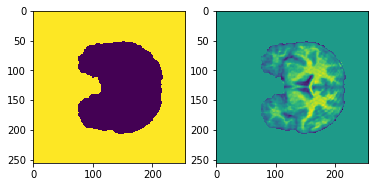

2757.2097
(1, 256, 256)


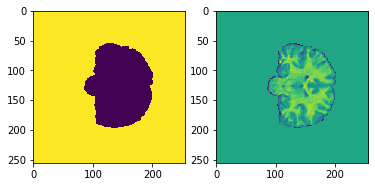

3072.1692
(1, 256, 256)


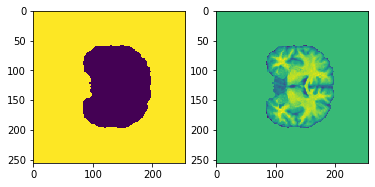

17.178741
(1, 256, 256)


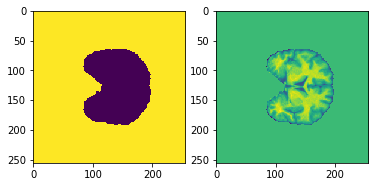

518.0067
(1, 256, 256)


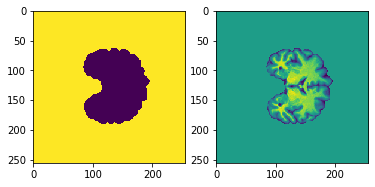

533.42017
(1, 256, 256)


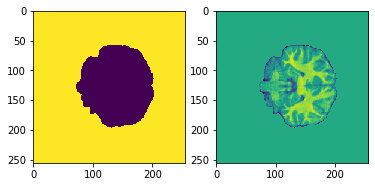

975.7117
(1, 256, 256)


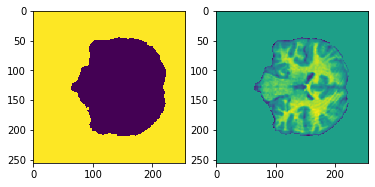

6408.3003
(1, 256, 256)


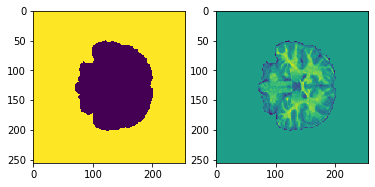

815.40295
(1, 256, 256)


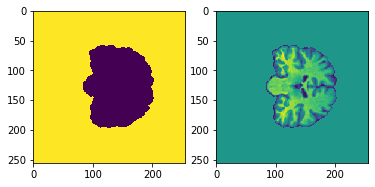

2413.6646
(1, 256, 256)


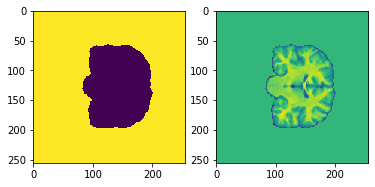

2230.7593
(1, 256, 256)


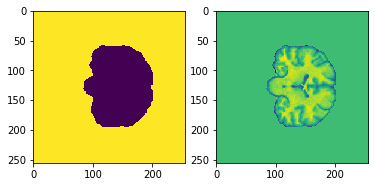

2704.3867
(1, 256, 256)


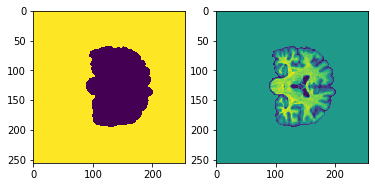

1261.052
(1, 256, 256)


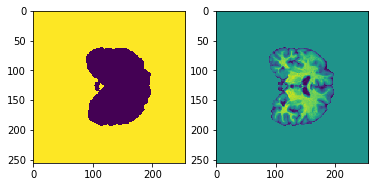

547.20197
(1, 256, 256)


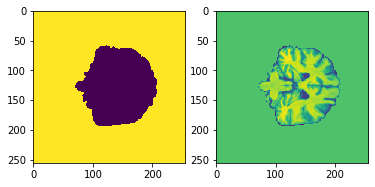

98.41333
(1, 256, 256)


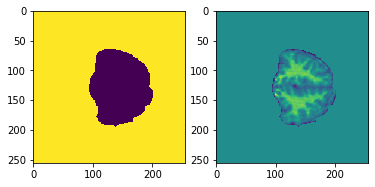

382.07016
(1, 256, 256)


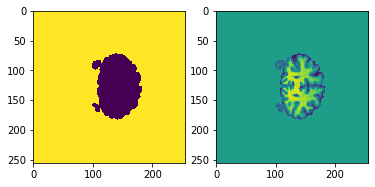

67.60736
(1, 256, 256)


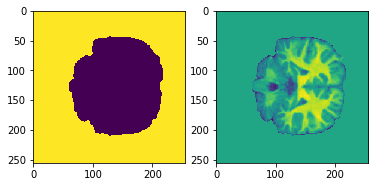

3302.705
(1, 256, 256)


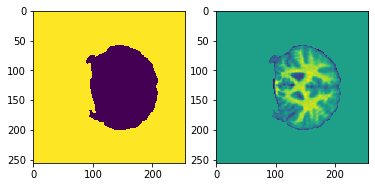

2502.0981
(1, 256, 256)


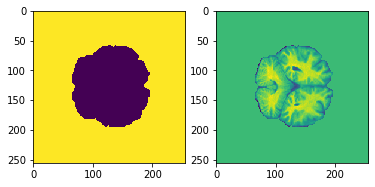

1867.7039
(1, 256, 256)


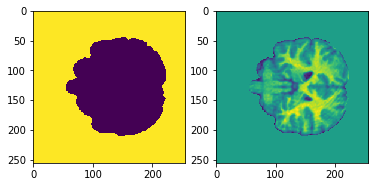

4214.1934
(1, 256, 256)


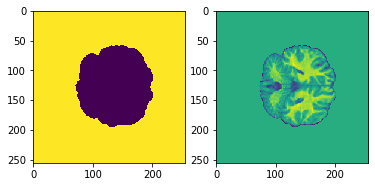

230.107
(1, 256, 256)


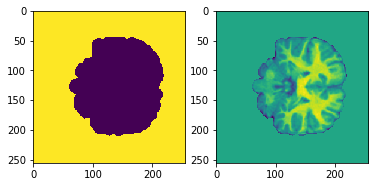

4553.9565
(1, 256, 256)


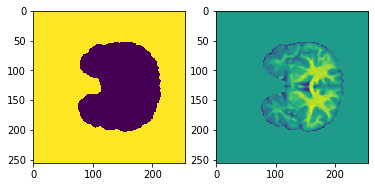

3159.244
(1, 256, 256)


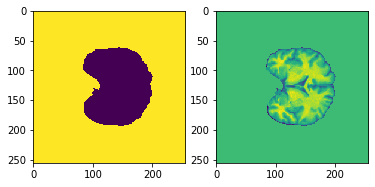

841.3954
(1, 256, 256)


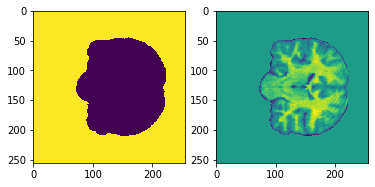

7385.997
(1, 256, 256)


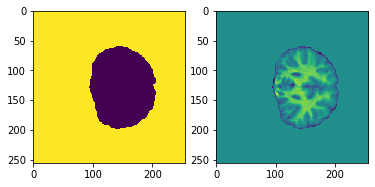

2908.8945
(1, 256, 256)


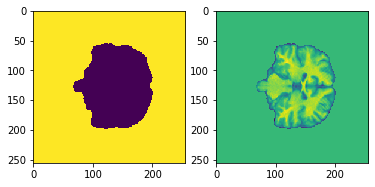

1588.2183
(1, 256, 256)


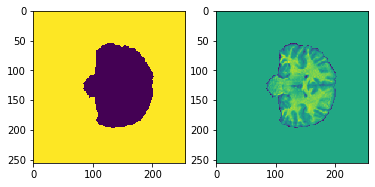

2725.811
(1, 256, 256)


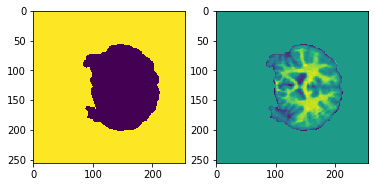

1854.3225
(1, 256, 256)


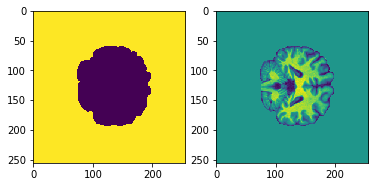

980.3805
(1, 256, 256)


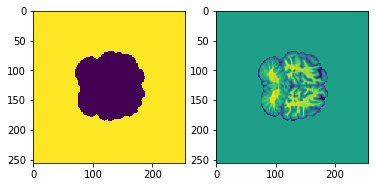

548.6284
(1, 256, 256)


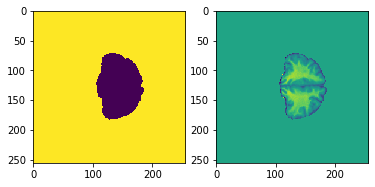

33.677856
(1, 256, 256)


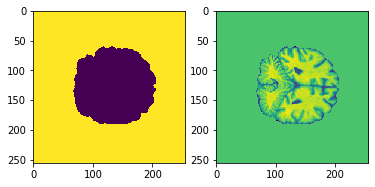

2087.4258
(1, 256, 256)


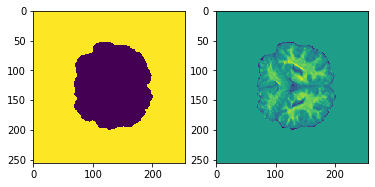

1079.3268
(1, 256, 256)


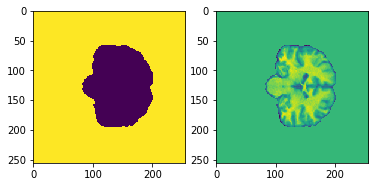

2363.1067
(1, 256, 256)


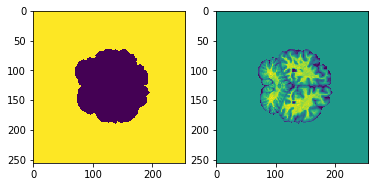

1523.4353
(1, 256, 256)


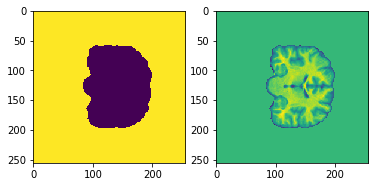

1882.7744
(1, 256, 256)


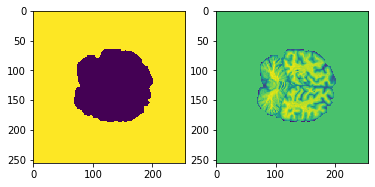

969.4743
(1, 256, 256)


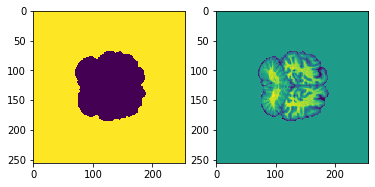

902.1494
(1, 256, 256)


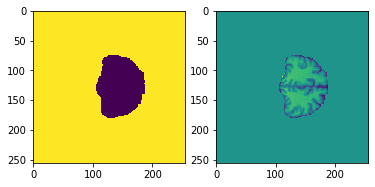

104.07593
(1, 256, 256)


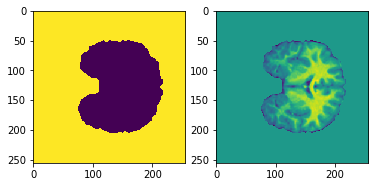

4442.577
(1, 256, 256)


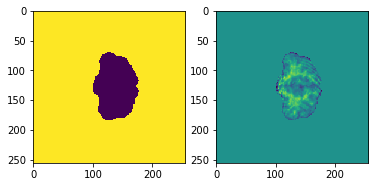

105.61905
(1, 256, 256)


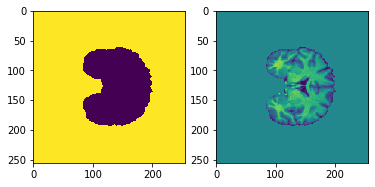

871.2797
(1, 256, 256)


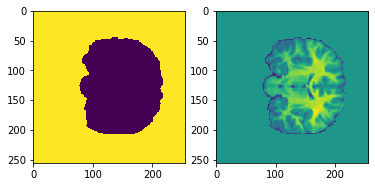

6757.533
(1, 256, 256)


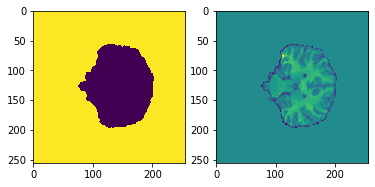

1671.824
(1, 256, 256)


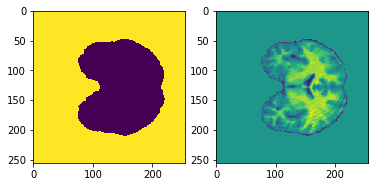

6494.5703
(1, 256, 256)


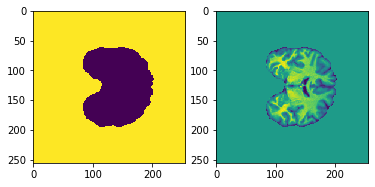

1393.2006
(1, 256, 256)


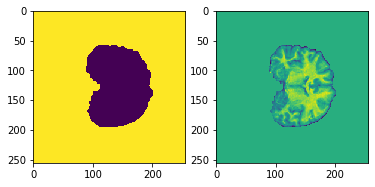

1116.1514
(1, 256, 256)


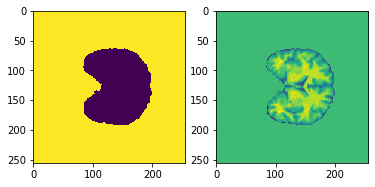

724.4242
(1, 256, 256)


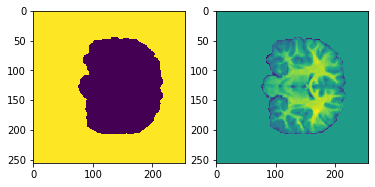

6651.452
(1, 256, 256)


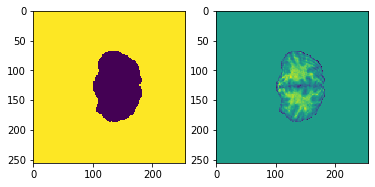

683.19006
(1, 256, 256)


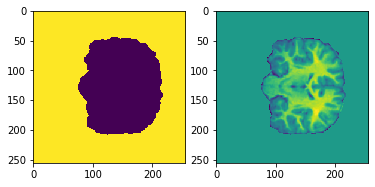

6577.518
(1, 256, 256)


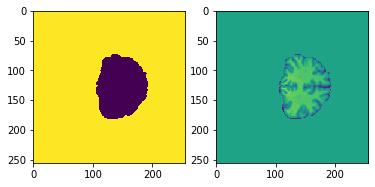

918.27216
(1, 256, 256)


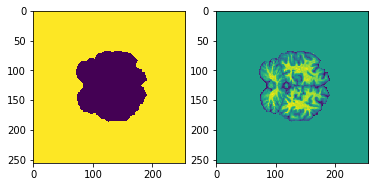

1065.7891
(1, 256, 256)


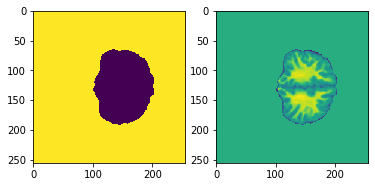

1236.2681
(1, 256, 256)


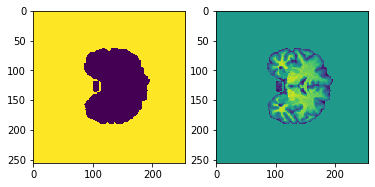

387.28458
(1, 256, 256)


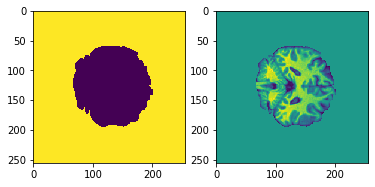

1931.4441
(1, 256, 256)


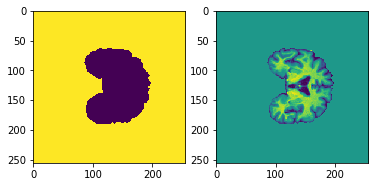

48.397415
(1, 256, 256)


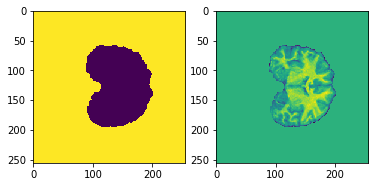

881.37756
(1, 256, 256)


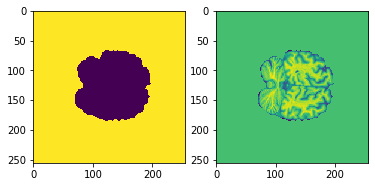

265.43784
(1, 256, 256)


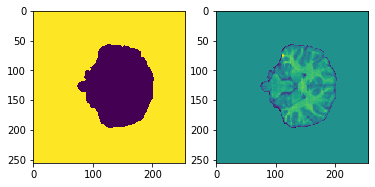

1772.5217
(1, 256, 256)


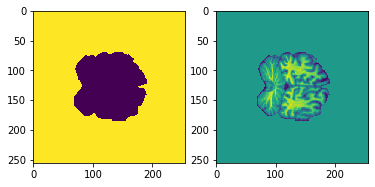

130.0492
(1, 256, 256)


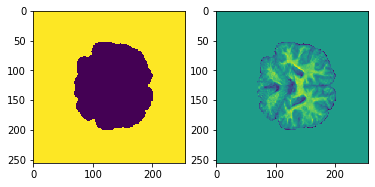

158.15204
(1, 256, 256)


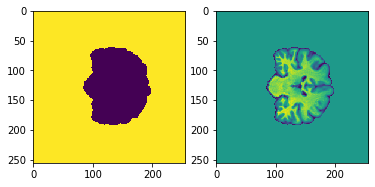

2470.5427
(1, 256, 256)


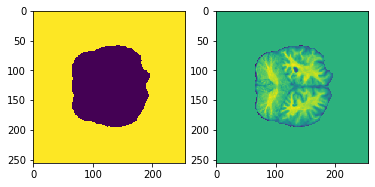

3130.0388
(1, 256, 256)


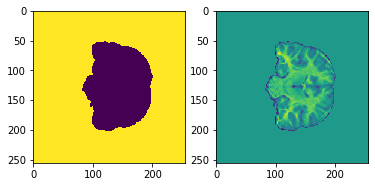

2847.672
(1, 256, 256)


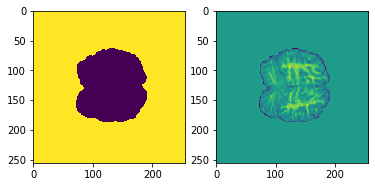

244.71948
(1, 256, 256)


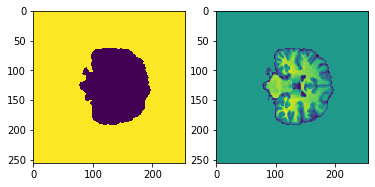

1277.9789
(1, 256, 256)


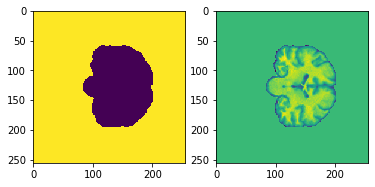

2772.9492
(1, 256, 256)


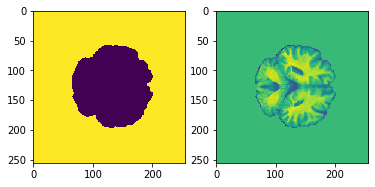

560.3888
(1, 256, 256)


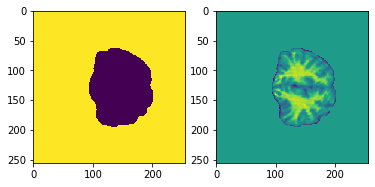

1541.7554
(1, 256, 256)


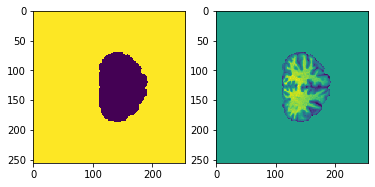

189.38794
(1, 256, 256)


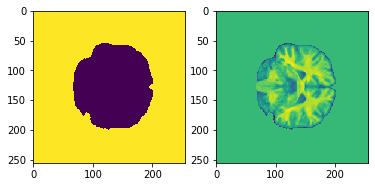

2031.245
(1, 256, 256)


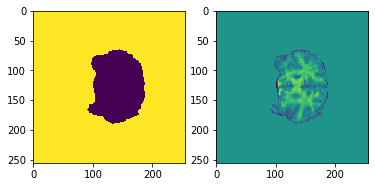

425.5904
(1, 256, 256)


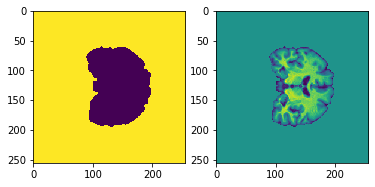

689.59436
(1, 256, 256)


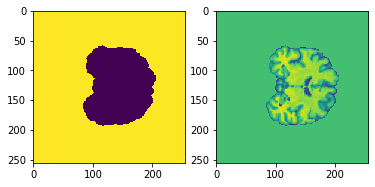

247.65213
(1, 256, 256)


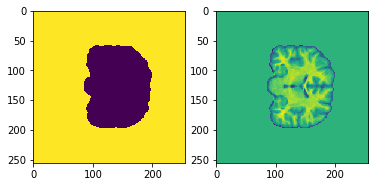

1718.0059
(1, 256, 256)


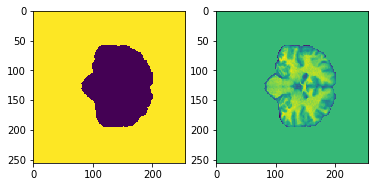

1959.0822
(1, 256, 256)


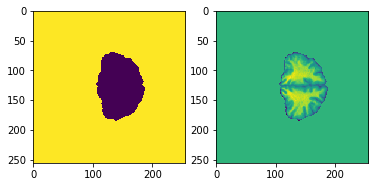

386.86426
(1, 256, 256)


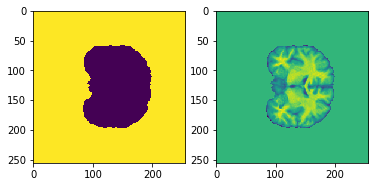

178.76797
(1, 256, 256)


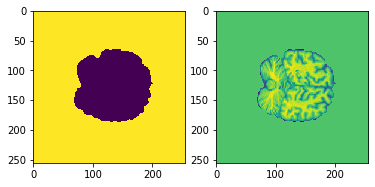

659.1729
(1, 256, 256)


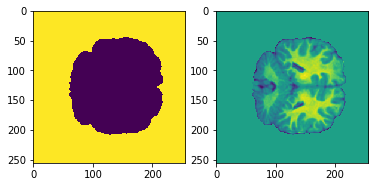

2279.1304
(1, 256, 256)


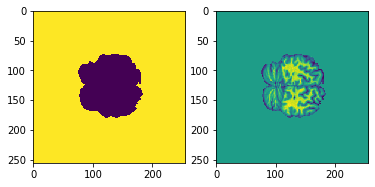

52.01233
(1, 256, 256)


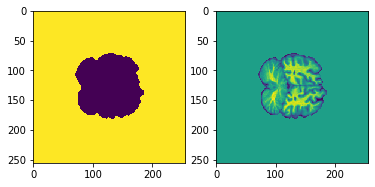

143.48224
(1, 256, 256)


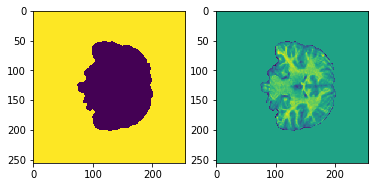

2392.1743
(1, 256, 256)


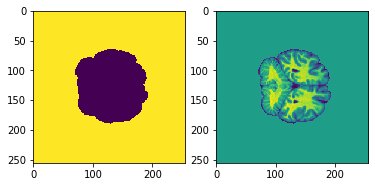

1084.4686
(1, 256, 256)


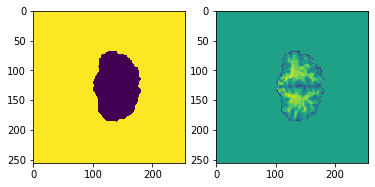

629.7495
(1, 256, 256)


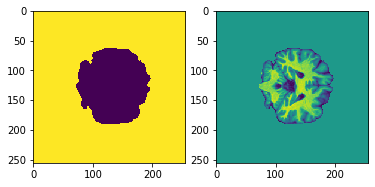

633.75586
(1, 256, 256)


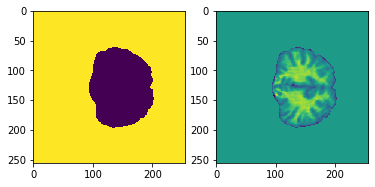

2055.457
(1, 256, 256)


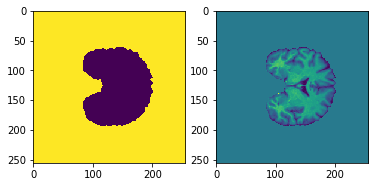

961.4095
(1, 256, 256)


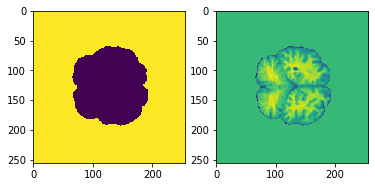

1669.2915
(1, 256, 256)


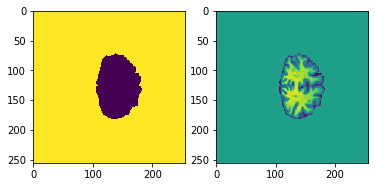

452.35333
(1, 256, 256)


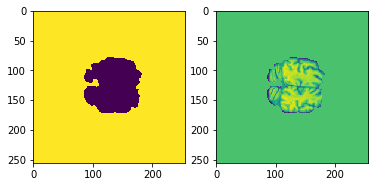

318.0887
(1, 256, 256)


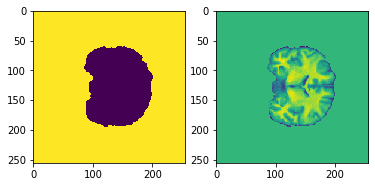

588.9045
(1, 256, 256)


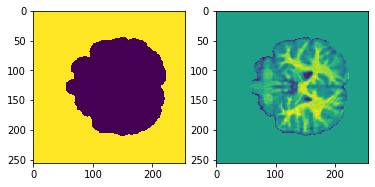

2947.9302
(1, 256, 256)


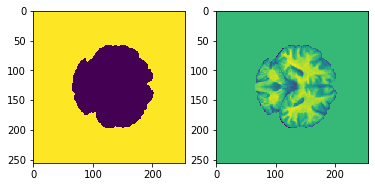

940.06934
(1, 256, 256)


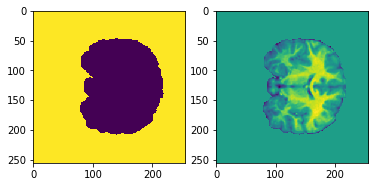

5264.7886
(1, 256, 256)


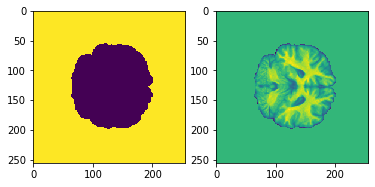

2004.0178
(1, 256, 256)


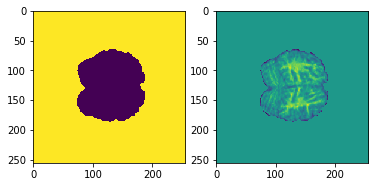

372.0732
(1, 256, 256)


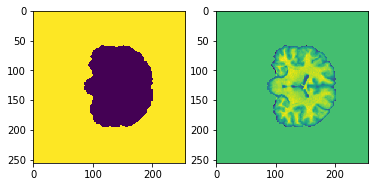

2440.0178
(1, 256, 256)


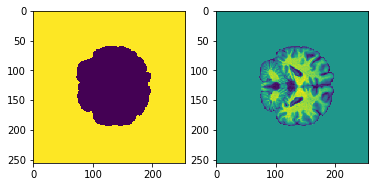

1187.9375
(1, 256, 256)


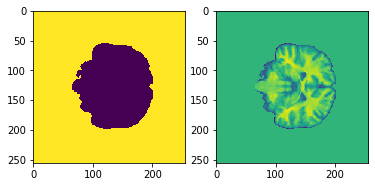

2003.266
(1, 256, 256)


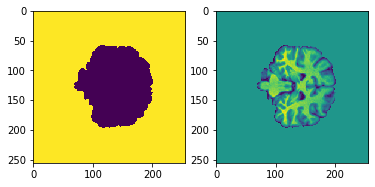

1493.595
(1, 256, 256)


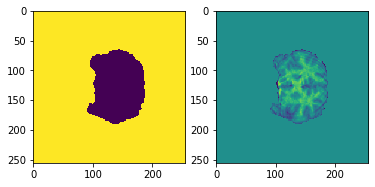

149.19556
(1, 256, 256)


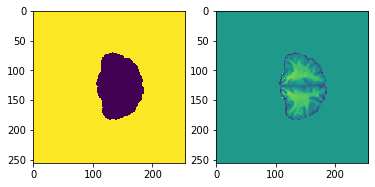

204.22845
(1, 256, 256)


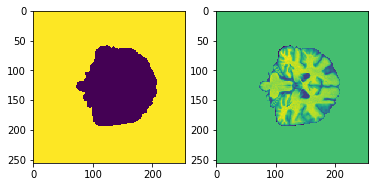

137.67435
(1, 256, 256)


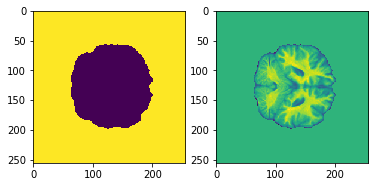

2351.1414
(1, 256, 256)


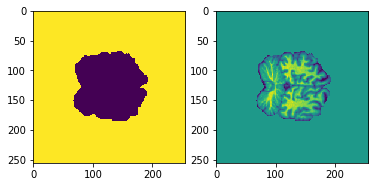

372.58792
(1, 256, 256)


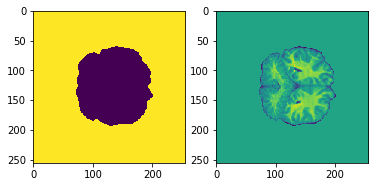

1209.6901
(1, 256, 256)


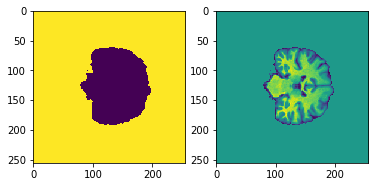

1872.2054
(1, 256, 256)


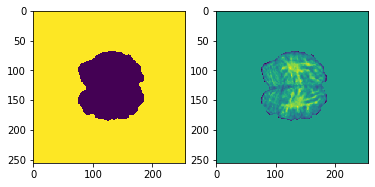

131.36066
(1, 256, 256)


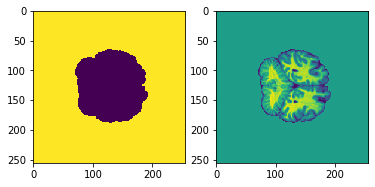

800.7335
(1, 256, 256)


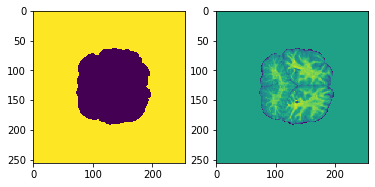

1705.5619
(1, 256, 256)


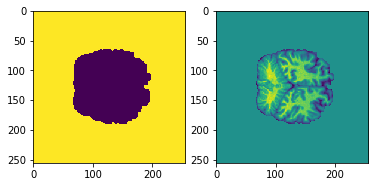

2255.1865
(1, 256, 256)


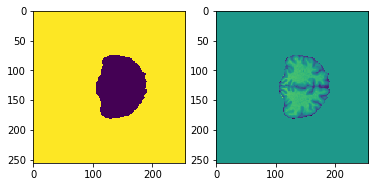

417.42078
(1, 256, 256)


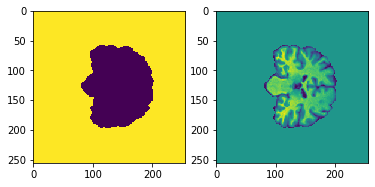

2200.9995
(1, 256, 256)


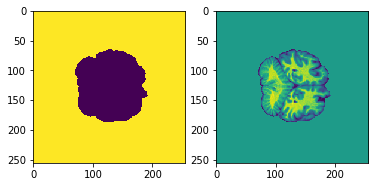

856.3074
(1, 256, 256)


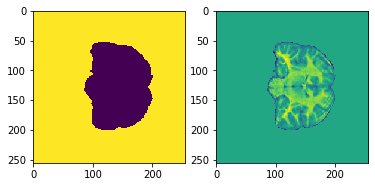

2609.6057
(1, 256, 256)


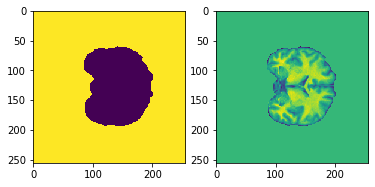

329.84662
(1, 256, 256)


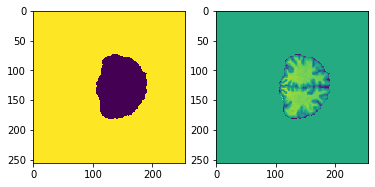

704.18317
(1, 256, 256)


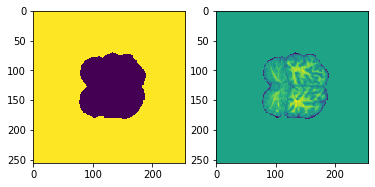

857.2337
(1, 256, 256)


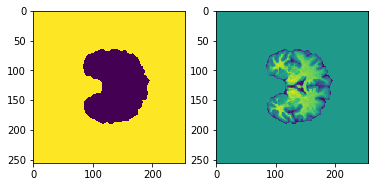

933.54736
(1, 256, 256)


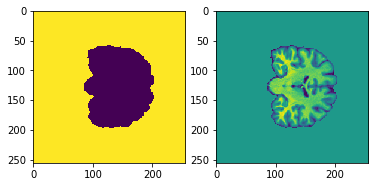

2304.3628
(1, 256, 256)


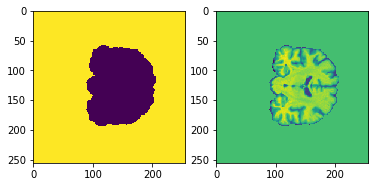

1612.9226
(1, 256, 256)


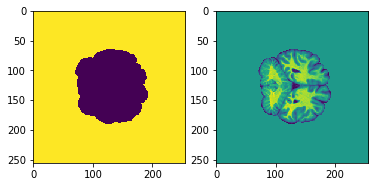

1485.0793
(1, 256, 256)


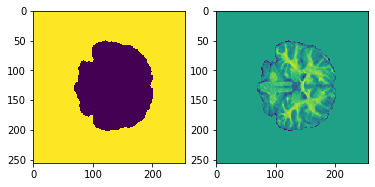

695.20715
(1, 256, 256)


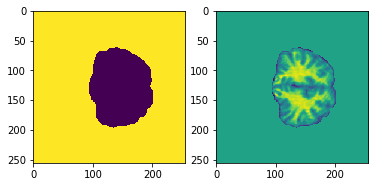

1896.3384
(1, 256, 256)


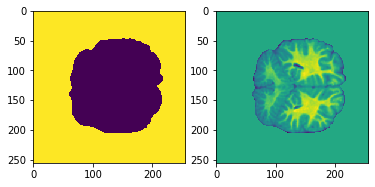

412.48157
(1, 256, 256)


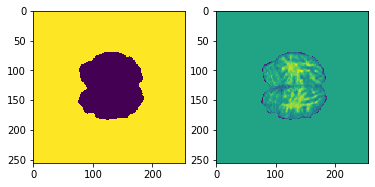

282.1795
(1, 256, 256)


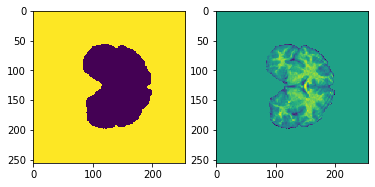

293.36716
(1, 256, 256)


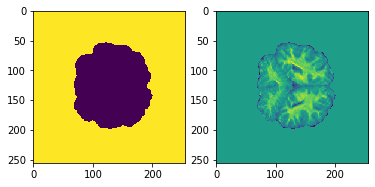

1531.3796
(1, 256, 256)


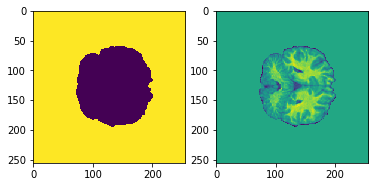

679.9263
(1, 256, 256)


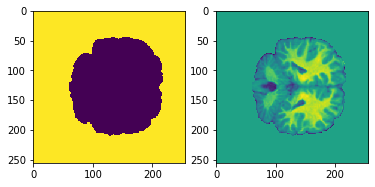

2455.5957
(1, 256, 256)


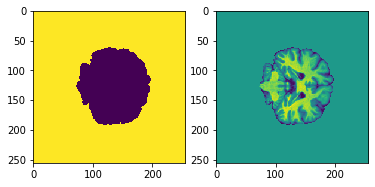

1327.944
(1, 256, 256)


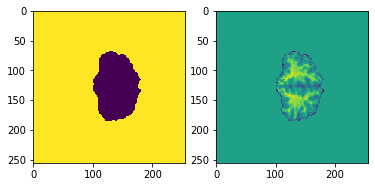

577.55615
(1, 256, 256)


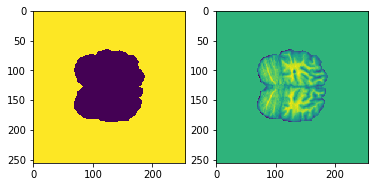

914.97534
(1, 256, 256)


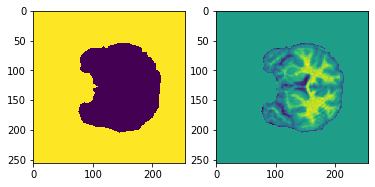

422.30682
(1, 256, 256)


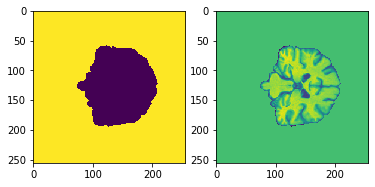

563.7329
(1, 256, 256)


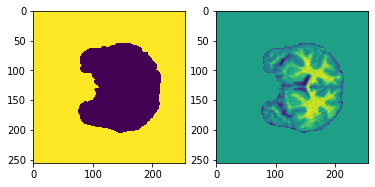

304.5932
(1, 256, 256)


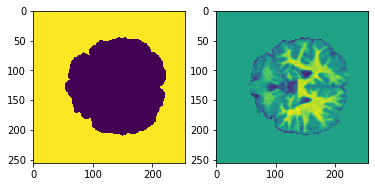

888.17224
(1, 256, 256)


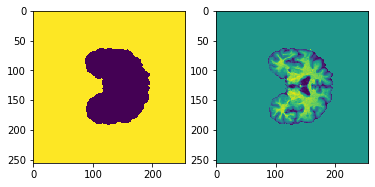

334.67175
(1, 256, 256)


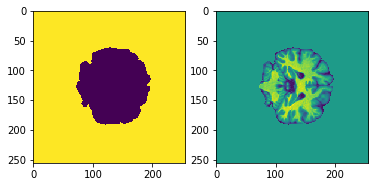

1078.2098
(1, 256, 256)


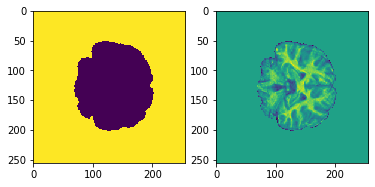

216.36902
(1, 256, 256)


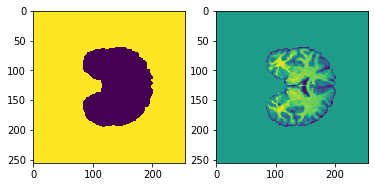

1028.433
(1, 256, 256)


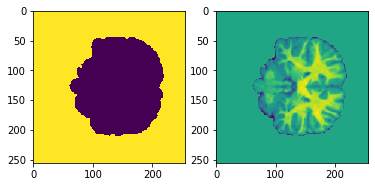

5156.3804
(1, 256, 256)


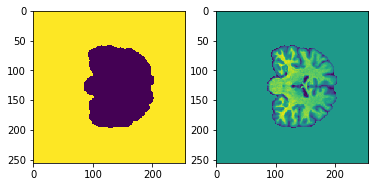

2605.5522
(1, 256, 256)


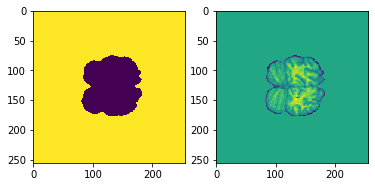

188.271
(1, 256, 256)


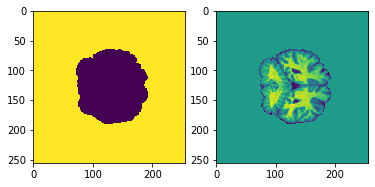

1590.4895
(1, 256, 256)


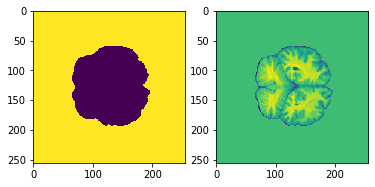

2202.9712
(1, 256, 256)


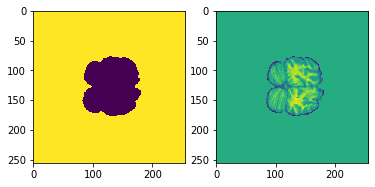

250.93805
(1, 256, 256)


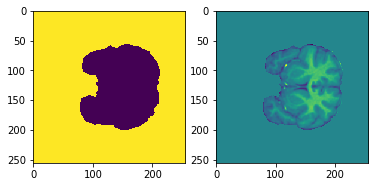

826.7942
(1, 256, 256)


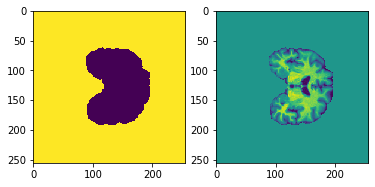

469.32184
(1, 256, 256)


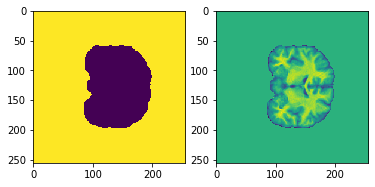

454.29147
(1, 256, 256)


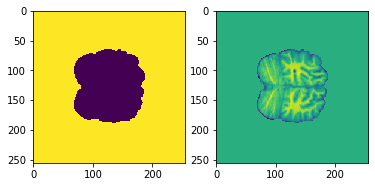

1105.5774
(1, 256, 256)


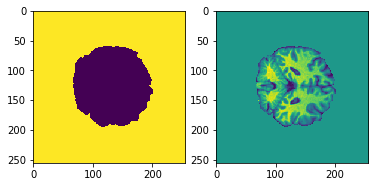

2466.7524
(1, 256, 256)


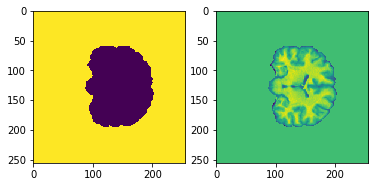

2026.3179
(1, 256, 256)


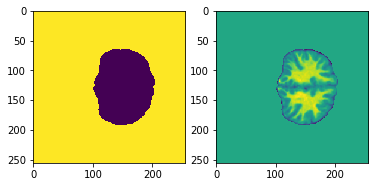

2253.9048
(1, 256, 256)


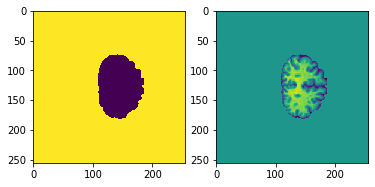

993.5048
(1, 256, 256)


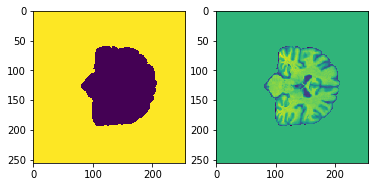

1086.2329
(1, 256, 256)


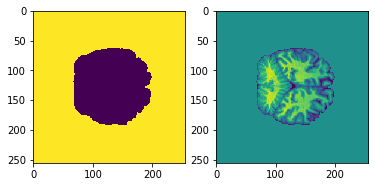

2419.1206
(1, 256, 256)


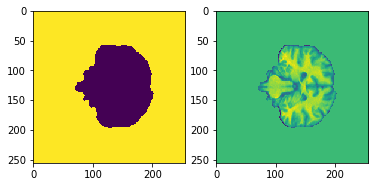

1629.083
(1, 256, 256)


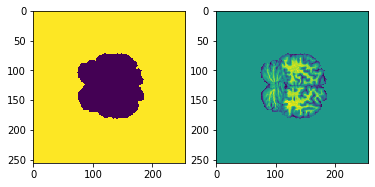

360.953
(1, 256, 256)


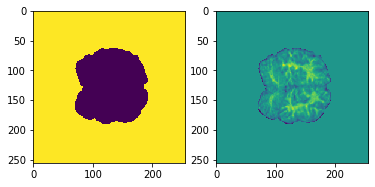

875.54425
(1, 256, 256)


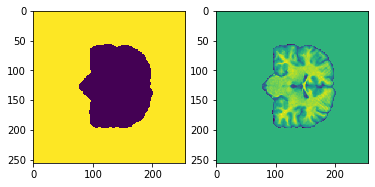

2667.441
(1, 256, 256)


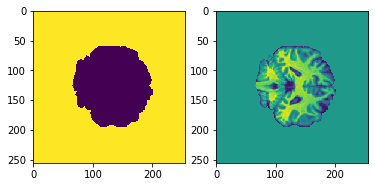

1652.1653
(1, 256, 256)


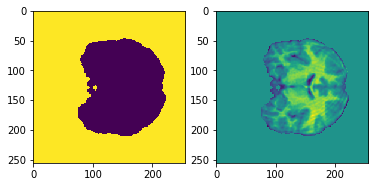

5364.779
(1, 256, 256)


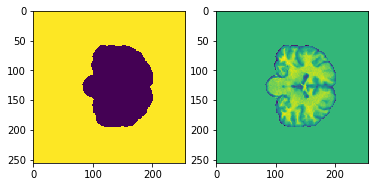

2656.709
(1, 256, 256)


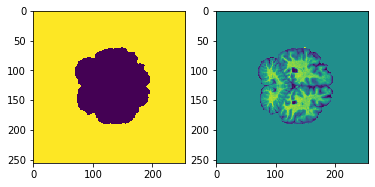

1695.2836
(1, 256, 256)


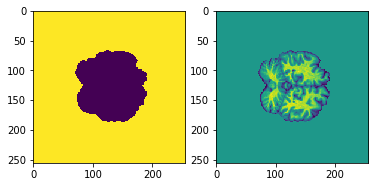

1048.705
(1, 256, 256)


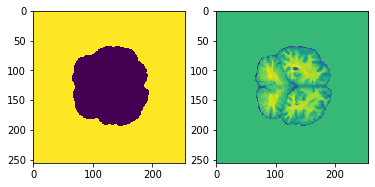

2004.4897
(1, 256, 256)


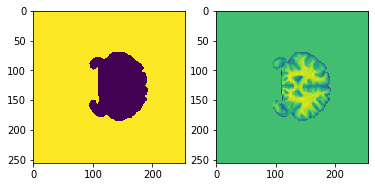

308.9451
(1, 256, 256)


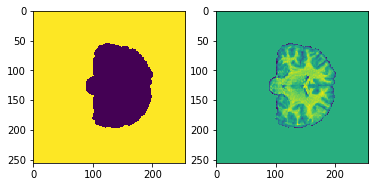

2314.812
(1, 256, 256)


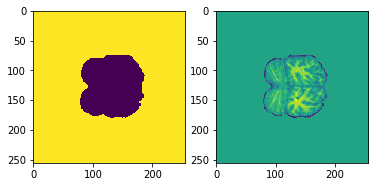

479.94745
(1, 256, 256)


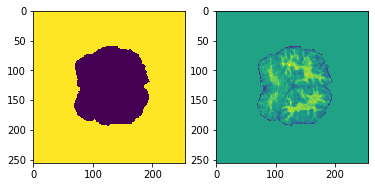

767.8385
(1, 256, 256)


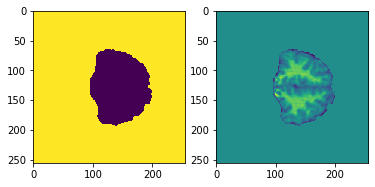

281.58368
(1, 256, 256)


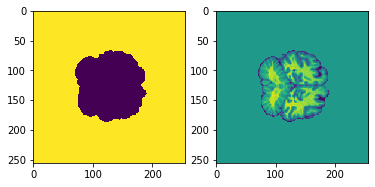

1187.5028
(1, 256, 256)


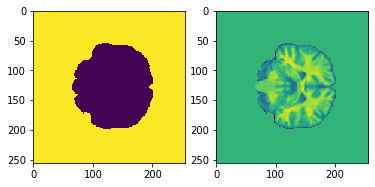

1970.6964
(1, 256, 256)


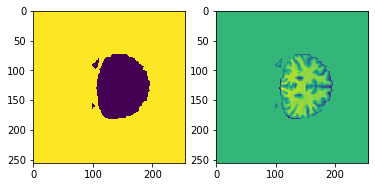

548.2877
(1, 256, 256)


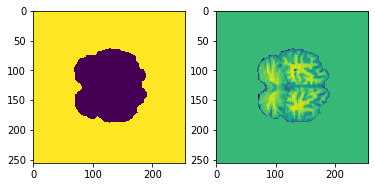

583.2445
(1, 256, 256)


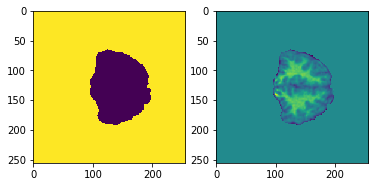

139.68336
(1, 256, 256)


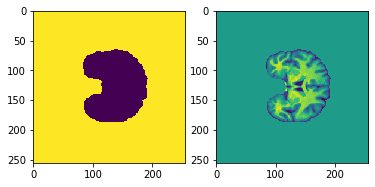

451.11987
(1, 256, 256)


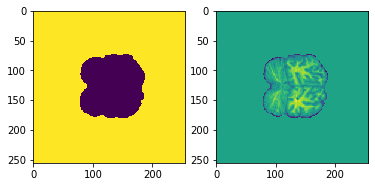

813.25964
(1, 256, 256)


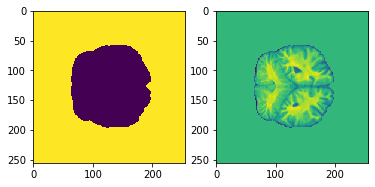

3682.9673
(1, 256, 256)


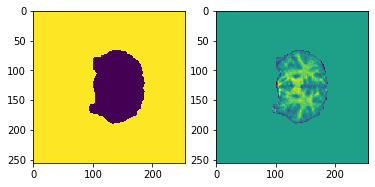

641.70905
(1, 256, 256)


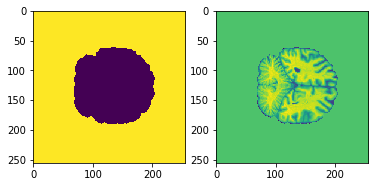

1841.8485
(1, 256, 256)


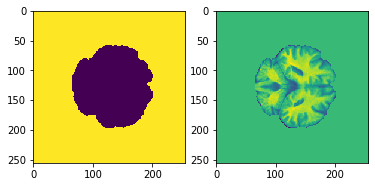

763.29877
(1, 256, 256)


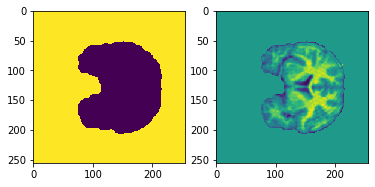

2229.1687
(1, 256, 256)


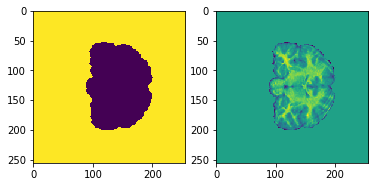

1805.918
(1, 256, 256)


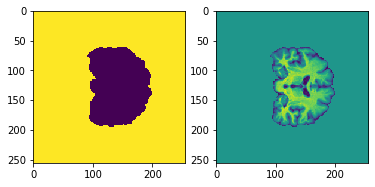

1366.2972
(1, 256, 256)


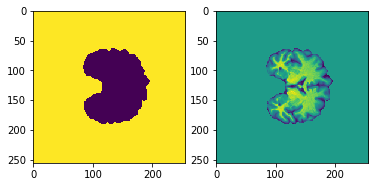

610.90247
(1, 256, 256)


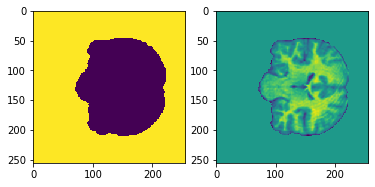

7357.086
(1, 256, 256)


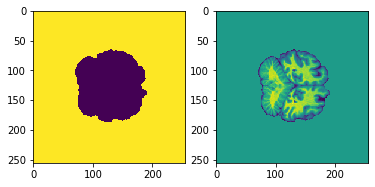

1167.7832
(1, 256, 256)


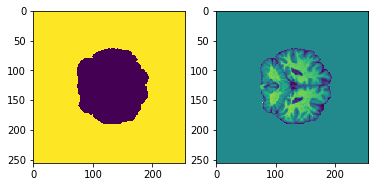

1214.175
(1, 256, 256)


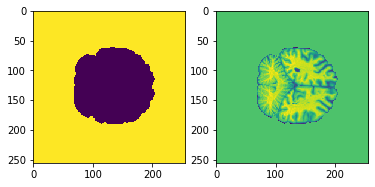

1794.0151
(1, 256, 256)


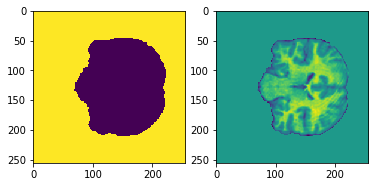

6966.965
(1, 256, 256)


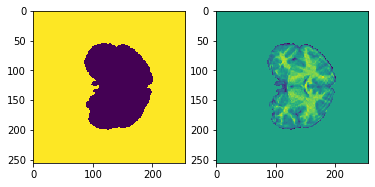

585.7467
(1, 256, 256)


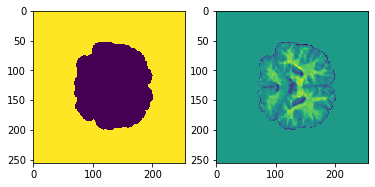

488.53647
(1, 256, 256)


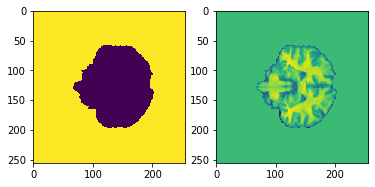

1495.7325
(1, 256, 256)


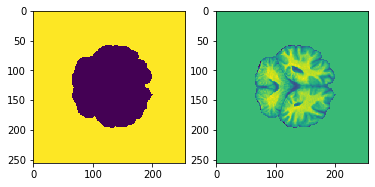

765.79913
(1, 256, 256)


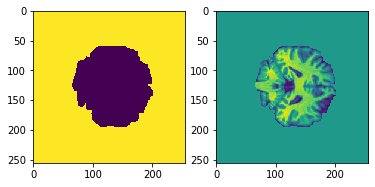

1689.6403
(1, 256, 256)


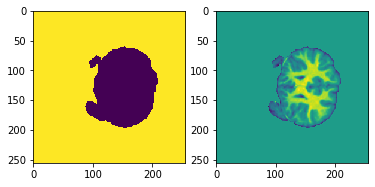

1911.2422
(1, 256, 256)


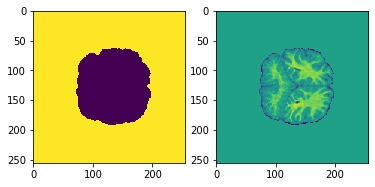

1495.5093
(1, 256, 256)


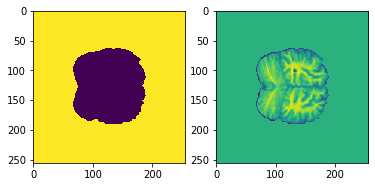

1767.6841
(1, 256, 256)


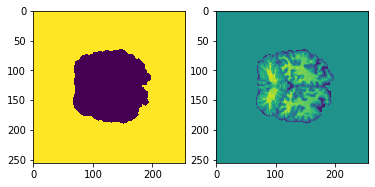

2169.7969
(1, 256, 256)


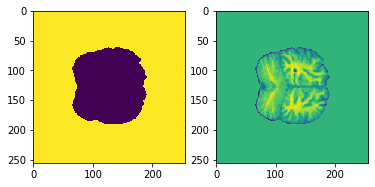

2177.3086
(1, 256, 256)


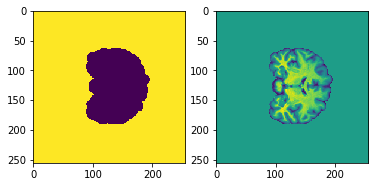

1279.8827
(1, 256, 256)


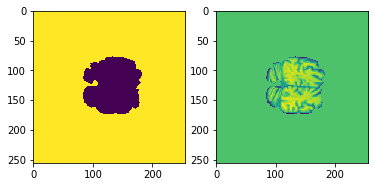

292.2564
(1, 256, 256)


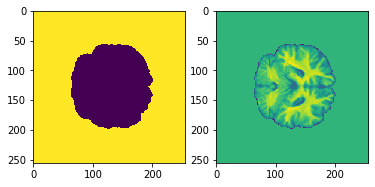

2088.311
(1, 256, 256)


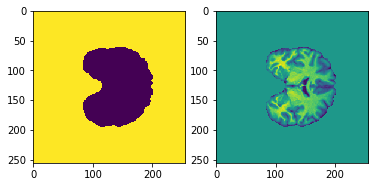

1186.3412
(1, 256, 256)


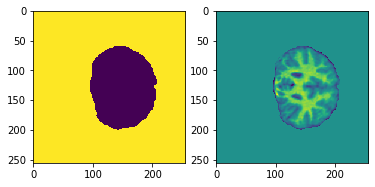

2978.6787
(1, 256, 256)


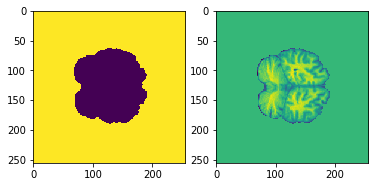

1016.80444
(1, 256, 256)


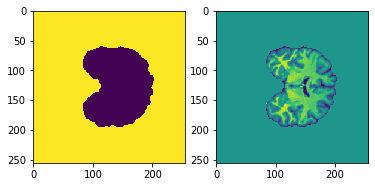

1744.7737
(1, 256, 256)


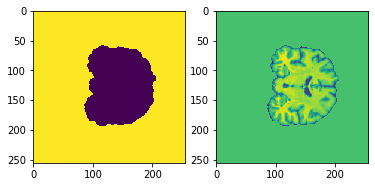

1175.5046
(1, 256, 256)


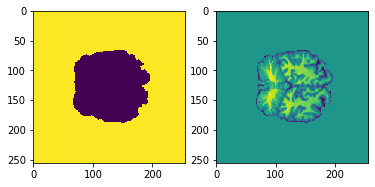

1605.9374
(1, 256, 256)


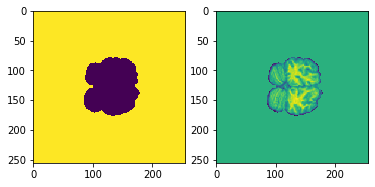

399.84866
(1, 256, 256)


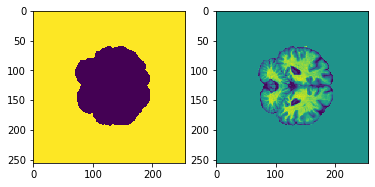

1838.3257
(1, 256, 256)


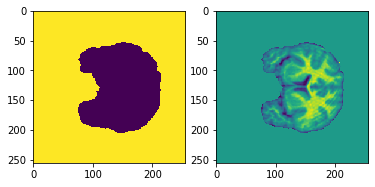

518.427
(1, 256, 256)


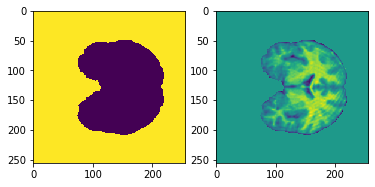

6350.689
(1, 256, 256)


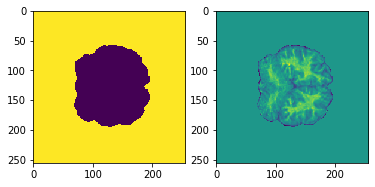

900.69324
(1, 256, 256)


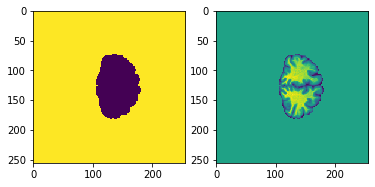

225.1806
(1, 256, 256)


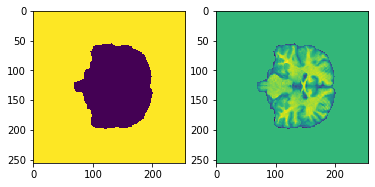

1796.856
(1, 256, 256)


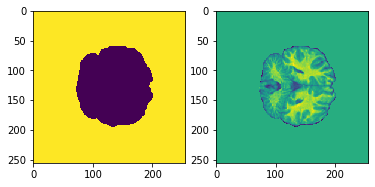

392.45575
(1, 256, 256)


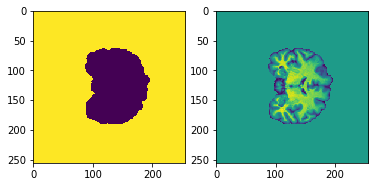

704.93384
(1, 256, 256)


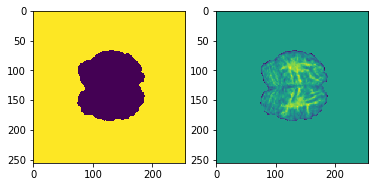

212.11731
(1, 256, 256)


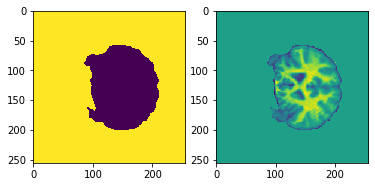

2273.8887
(1, 256, 256)


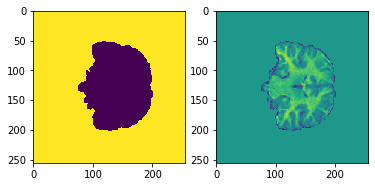

2369.1003
(1, 256, 256)


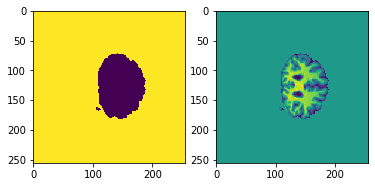

113.838135
(1, 256, 256)


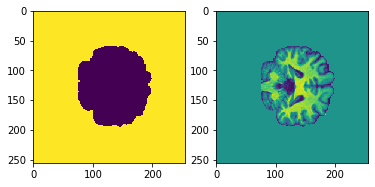

832.9538
(1, 256, 256)


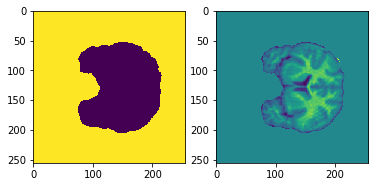

930.1815
(1, 256, 256)


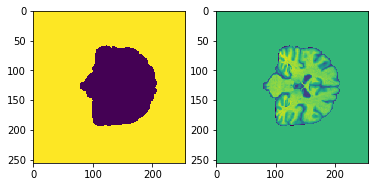

1038.8195
(1, 256, 256)


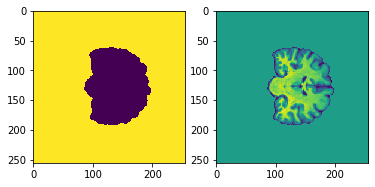

1884.8215
(1, 256, 256)


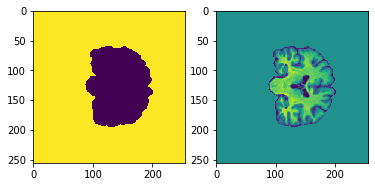

1808.5034
(1, 256, 256)


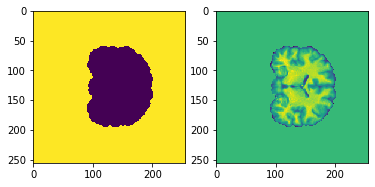

1318.3333
(1, 256, 256)


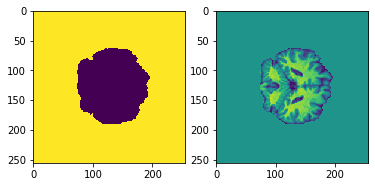

940.0827
(1, 256, 256)


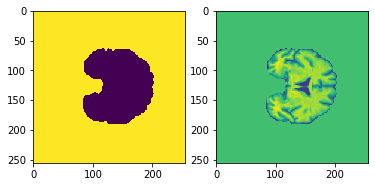

663.34845
(1, 256, 256)


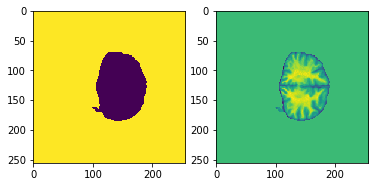

231.32367
(1, 256, 256)


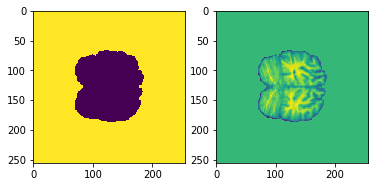

620.38293
(1, 256, 256)


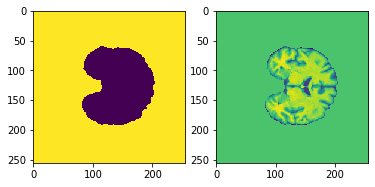

1374.2892
(1, 256, 256)


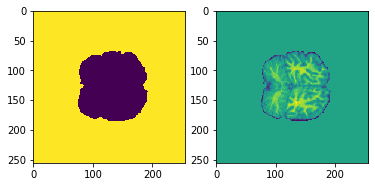

778.406
(1, 256, 256)


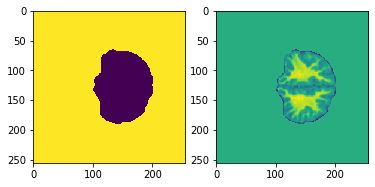

182.17233
(1, 256, 256)


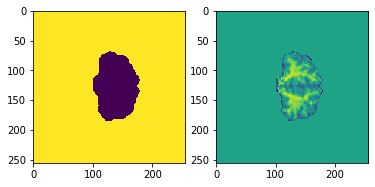

474.0359
(1, 256, 256)


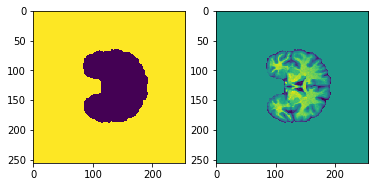

1051.135
(1, 256, 256)


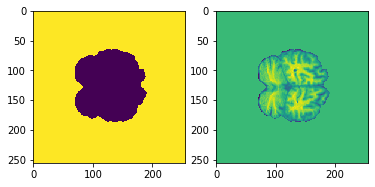

200.36243
(1, 256, 256)


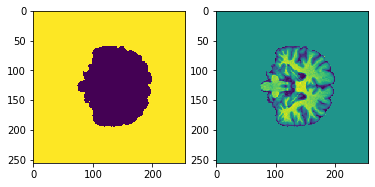

1151.6659
(1, 256, 256)


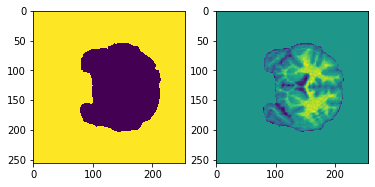

657.04974
(1, 256, 256)


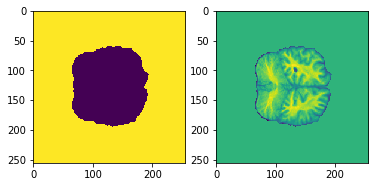

2811.793
(1, 256, 256)


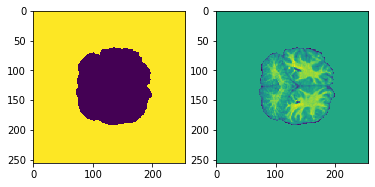

1359.0654
(1, 256, 256)


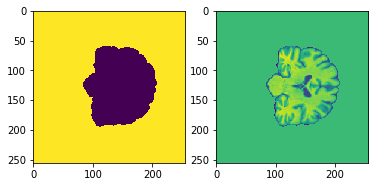

1065.076
(1, 256, 256)


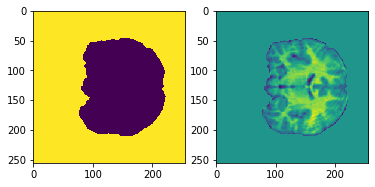

6833.5205
(1, 256, 256)


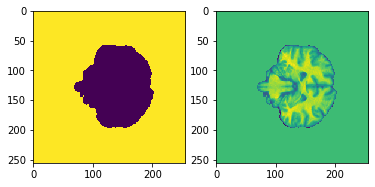

1602.5598
(1, 256, 256)


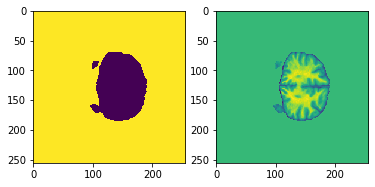

319.9491


In [0]:
 import matplotlib.pyplot as plt
import numpy.ma as ma
 test = os.listdir("/content/new_data/Training_Set/Masks")
k = 0
for i in test:
  if i.endswith(".npy") == True:
    temp= np.load("/content/new_data/Training_Set/Images" + "/" + i)
    print(temp.shape)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(temp[0,:,:]== 0)
    plt.subplot(1,2,2)
    plt.imshow(temp[0,:,:])
    plt.show()
    print(np.sum(temp))
    k = k+1
    if (k > 250):
      break

## Data Generator Functions

In [0]:
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
import cv2
import torch
from torchvision import transforms, utils

class SegDataset(Dataset):
    """Segmentation Dataset"""
 
    def __init__(self, root_dir, imageFolder, maskFolder, transform=None, seed=None, fraction=None, subset=None, imagecolormode='rgb', maskcolormode='grayscale'):
        """
        Args:
            root_dir (string): Directory with all the images and should have the following structure.
            root
            --Images
            -----Img 1
            -----Img N
            --Mask
            -----Mask 1
            -----Mask N
            imageFolder (string) = 'Images' : Name of the folder which contains the Images.
            maskFolder (string)  = 'Masks : Name of the folder which contains the Masks.
            transform (callable, optional): Optional transform to be applied on a sample.
            seed: Specify a seed for the train and test split
            fraction: A float value from 0 to 1 which specifies the validation split fraction
            subset: 'Train' or 'Test' to select the appropriate set.
            imagecolormode: 'rgb' or 'grayscale'
            maskcolormode: 'rgb' or 'grayscale'
        """
        self.color_dict = {'rgb': 1, 'grayscale': 0}
        assert(imagecolormode in ['rgb', 'grayscale'])
        assert(maskcolormode in ['rgb', 'grayscale'])
 
        self.imagecolorflag = self.color_dict[imagecolormode]
        self.maskcolorflag = self.color_dict[maskcolormode]
        self.root_dir = root_dir
        self.transform = transform
        if not fraction:
            self.image_names = sorted(
                glob.glob(os.path.join(self.root_dir, imageFolder, '*')))
            self.mask_names = sorted(
                glob.glob(os.path.join(self.root_dir, maskFolder, '*')))
        else:
            assert(subset in ['Train', 'Test'])
            self.fraction = fraction
            self.image_list = np.array(
                sorted(glob.glob(os.path.join(self.root_dir, imageFolder, '*'))))
            self.mask_list = np.array(
                sorted(glob.glob(os.path.join(self.root_dir, maskFolder, '*'))))
            if seed:
                np.random.seed(seed)
            indices = np.arange(len(self.image_list))
            np.random.shuffle(indices)
            self.image_list = self.image_list[indices]
            self.mask_list = self.mask_list[indices]
            if subset == 'Train':
                self.image_names = self.image_list[:int(
                    np.ceil(len(self.image_list)*(1-self.fraction)))]
                self.mask_names = self.mask_list[:int(
                    np.ceil(len(self.mask_list)*(1-self.fraction)))]
            else:
                self.image_names = self.image_list[int(
                    np.ceil(len(self.image_list)*(1-self.fraction))):]
                self.mask_names = self.mask_list[int(
                    np.ceil(len(self.mask_list)*(1-self.fraction))):]
 
    def __len__(self):
        return len(self.image_names)
 
    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        if self.imagecolorflag:
            image = np.load(img_name)
        else:
            image = np.load(img_name)
        msk_name = self.mask_names[idx]
        if self.maskcolorflag:
            mask = np.load(msk_name)
        else:
            mask = np.load(msk_name)
        sample = {'image': image, 'mask': mask}
 
        if self.transform:
            sample = self.transform(sample)
 
        return sample

## Functions for Data Generators

In [0]:
class Resize(object):
    """Resize image and/or masks."""
 
    def __init__(self, imageresize, maskresize):
        self.imageresize = imageresize
        self.maskresize = maskresize
 
    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        if len(image.shape) == 3:
            image = image.transpose(1, 2, 0)
        if len(mask.shape) == 3:
            mask = mask.transpose(1, 2, 0)
        mask = cv2.resize(mask, self.maskresize, cv2.INTER_AREA)
        image = cv2.resize(image, self.imageresize, cv2.INTER_AREA)
        if len(image.shape) == 3:
            image = image.transpose(2, 0, 1)
        if len(mask.shape) == 3:
            mask = mask.transpose(2, 0, 1)
 
        return {'image': image,
                'mask': mask}
 
 
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
 
    def __call__(self, sample, maskresize=None, imageresize=None):
        image, mask = sample['image'], sample['mask']
        if len(mask.shape) == 2:
            mask = mask.reshape((1,)+mask.shape)
        if len(image.shape) == 2:
            image = image.reshape((1,)+image.shape)
        return {'image': torch.from_numpy(image),
                'mask': torch.from_numpy(mask)}
 
 
class Normalize(object):
    '''Normalize image'''
 
    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        return {'image': image.type(torch.FloatTensor)/255,
                'mask': mask.type(torch.FloatTensor)/255}


          

## Data Generators

In [0]:
data_dir = "/content/new_data"
training_transform = transforms.Compose([ToTensor()])
training_dataset = SegDataset(root_dir=os.path.join(data_dir, 'Training_Set'), transform=training_transform, maskFolder='Masks', imageFolder='Images')
training_dataloader = DataLoader(training_dataset, batch_size=16,shuffle=True, num_workers=8)

validation_transform = transforms.Compose([ToTensor()])
validation_dataset = SegDataset(root_dir=os.path.join(data_dir, 'Validation_Set'), transform=validation_transform, maskFolder='Masks', imageFolder='Images')
validation_dataloader = DataLoader(validation_dataset, batch_size=16,shuffle=True, num_workers=8)

## ResNet Functions

In [0]:
import torch
import torch.nn as nn

from functools import partial
from dataclasses import dataclass
from collections import OrderedDict


class Conv2dAuto(nn.Conv2d):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.padding =  (self.kernel_size[0] // 2, self.kernel_size[1] // 2) # dynamic add padding based on the kernel_size
        
conv3x3 = partial(Conv2dAuto, kernel_size=3, bias=False)

def activation_func(activation):
    return  nn.ModuleDict([
        ['relu', nn.ReLU(inplace=True)],
        ['leaky_relu', nn.LeakyReLU(negative_slope=0.01, inplace=True)],
        ['selu', nn.SELU(inplace=True)],
        ['none', nn.Identity()]
    ])[activation]


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, activation='relu'):
        super().__init__()
        self.in_channels, self.out_channels, self.activation = in_channels, out_channels, activation
        self.blocks = nn.Identity()
        self.activate = activation_func(activation)
        self.shortcut = nn.Identity()   
    
    def forward(self, x):
        residual = x
        #print("a:",residual)
        if self.should_apply_shortcut:
           residual = self.shortcut(x)
           #print("b:",residual)
        x = self.blocks(x)
        #print("c:",x)
        x += residual
        #print("d:",x)
        x = self.activate(x)
        #print("f:",x)
        return x
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.out_channels


class ResNetResidualBlock(ResidualBlock):
    def __init__(self, in_channels, out_channels, expansion=1, downsampling=1, conv=conv3x3, *args, **kwargs):
        super().__init__(in_channels, out_channels)
        self.expansion, self.downsampling, self.conv = expansion, downsampling, conv
        self.shortcut = nn.Sequential(
            nn.Conv2d(self.in_channels, self.expanded_channels, kernel_size=1,
                      stride=self.downsampling, bias=False),
            nn.BatchNorm2d(self.expanded_channels)) if self.should_apply_shortcut else None
        
        
    @property
    def expanded_channels(self):
        return self.out_channels * self.expansion
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.expanded_channels



def conv_bn(in_channels, out_channels, conv, *args, **kwargs):
    return nn.Sequential(conv(in_channels, out_channels, *args, **kwargs), nn.BatchNorm2d(out_channels))

class ResNetBasicBlock(ResNetResidualBlock):
    expansion = 1
    def __init__(self, in_channels, out_channels, *args, **kwargs):
        super().__init__(in_channels, out_channels, *args, **kwargs)
        self.blocks = nn.Sequential(
            conv_bn(self.in_channels, self.out_channels, conv=self.conv, bias=False, stride=self.downsampling),
            activation_func(self.activation),
            conv_bn(self.out_channels, self.expanded_channels, conv=self.conv, bias=False),
        )

class ResNetLayer(nn.Module):
    def __init__(self, in_channels, out_channels, block=ResNetBasicBlock, n=1, *args, **kwargs):
        super().__init__()
        # 'We perform downsampling directly by convolutional layers that have a stride of 2.'
        downsampling = 2 if in_channels != out_channels else 1
        
        self.blocks = nn.Sequential(
            block(in_channels , out_channels, *args, **kwargs, downsampling=downsampling),
            *[block(out_channels * block.expansion, 
                    out_channels, downsampling=1, *args, **kwargs) for _ in range(n - 1)]
        )

    def forward(self, x):
        x = self.blocks(x)
        return x


## Model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Unet(nn.Module):
    """
    Basic U-net model
    """

    def __init__(self, input_size, output_size):

        super(Unet, self).__init__()

        # conv1 down
        self.conv1 = ResNetBasicBlock(input_size, 32)

        # max-pool 1
        self.pool1 = nn.Conv2d(in_channels=32,
                               out_channels=32,
                               kernel_size=2,
                               stride=2)
        # conv2 down
        self.conv2 = ResNetBasicBlock(32, 64)

        # max-pool 2
        self.pool2 = nn.Conv2d(in_channels=64,
                               out_channels=64,
                               kernel_size=2,
                               stride=2)
        # conv3 down
        self.conv3 = ResNetBasicBlock(64,128)
        
        # max-pool 3
        self.pool3 = nn.Conv2d(in_channels=128,
                               out_channels=128,
                               kernel_size=2,
                               stride=2)
        
        # conv4 down 
        self.conv4 = ResNetBasicBlock(128,256)

        # max-pool 4
        self.pool4 = nn.Conv2d(in_channels=256,
                               out_channels=256,
                               kernel_size=2,
                               stride=2)       

        # conv5 down (latent space)
        self.conv5x = ResNetBasicBlock(256,512)


        # up-sample conv5
        self.up0 = nn.ConvTranspose2d(in_channels=512,
                                      out_channels=256,
                                      kernel_size=2,
                                      stride=2)  
         
        self.conv5a = nn.Conv2d(in_channels=256,
                               out_channels=256,
                               kernel_size=3,
                               padding=1)
        # up-sample conv4
        self.up1 = nn.ConvTranspose2d(in_channels=256,
                                      out_channels=128,
                                      kernel_size=2,
                                      stride=2)        

         
        # conv 5 (add up1 + conv3)
        self.conv5 = nn.Conv2d(in_channels=128,
                               out_channels=128,
                               kernel_size=3,
                               padding=1)
        # up-sample conv5
        self.up2 = nn.ConvTranspose2d(in_channels=128,
                                      out_channels=64,
                                      kernel_size=2,
                                      stride=2)
 

        # conv6 (add up2 + conv2) 
        self.conv6 = nn.Conv2d(in_channels=64,
                               out_channels=64,
                               kernel_size=3,
                               padding=1)
        # up 3
        self.up3 = nn.ConvTranspose2d(in_channels=64,
                                      out_channels=32,
                                      kernel_size=2,
                                      stride=2)


        # conv7 (add up3 + conv1)
        self.conv7 = nn.Conv2d(in_channels=32,
                               out_channels=32,
                               kernel_size=3,
                               padding=1)
        
        # conv8 (classification)
        self.conv8 = nn.Conv2d(in_channels=32,
                               out_channels=output_size,
                               kernel_size=1)

    def forward(self, x):

        # encoder
        x1 = F.relu(self.conv1(x))

        x1p = self.pool1(x1)
        
        x2 = F.relu(self.conv2(x1p))

        x2p = self.pool2(x2)

        x3 = F.relu(self.conv3(x2p))

        x3p = self.pool3(x3)
        
        x4 = F.relu(self.conv4(x3p))

        x4p = self.pool4(x4)

        # latent space
        x5a = F.relu(self.conv5x(x4p))

        # decoder
        up0 = self.up0(x5a)

        x5b = F.relu(self.conv5a(up0 + x4))

        up1 = self.up1(x5b)

        x5 = F.relu(self.conv5(up1 + x3)) # look how layers are added :o

        up2 = self.up2(x5)

        x6 = F.relu(self.conv6(up2 + x2))

        up3 = self.up3(x6)

        x7 = F.relu(self.conv7(up3 + x1))
        
        # output layer (2 classes)
        # we use a softmax layer to return probabilities for each class
        out = F.softmax(self.conv8(x7), dim=1) 
        return out

## Early Stopping

In [0]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

## Training

In [0]:
from torch.optim import Adadelta
import torch.nn as nn
import torch.nn.functional as F
import segmentation_models_pytorch as smp
options['batch_size'] = 16

def dice_coef(input, target):
    smooth = 1

    iflat = input.reshape(-1)
    tflat = target.reshape(-1)
    intersection = (iflat * tflat).sum()
    #print("inside: ",intersection, iflat.sum(), tflat.sum())
    return  ((2. * intersection + smooth) /
              (iflat.sum() + tflat.sum() + smooth))


def dice_coef_multilabel(y_true, y_pred, numLabels=4):
    dice=0
    for index in range(0,numLabels):
        dice -= dice_coef(y_true[:,0,:,:] == index , y_pred[:,index,:,:])
        dice_total = 4 + dice
        #print(index ,":",dice_coef(y_true[:,0,:,:] == index , y_pred[:,index,:,:]))
    return dice_total


def dice_coef_singlelabel(y_true, y_pred):
    index=1
    dice = -dice_coef(y_true[:,0,:,:] == index , y_pred[:,index,:,:])
    return dice

# mkdir for stored models
!mkdir models
!mkdir checkpoints

patience_es = 30
# initialize the early_stopping object
early_stopping = EarlyStopping(patience=patience_es, verbose=True)
# Define the Unet model 
# 2 input channels (FLAIR and T1) - Changed it to one channel
# 2 output classes (healthy and wmh) (we ignore other pathologies) - Changed it to four since CSF,WM,GM and Background
# densenet201
train_loss_all = []
train_acc_all = []
val_loss_all = []
val_acc_all = []


aux_params=dict(
    dropout=0.3,               # dropout ratio, default is None
    activation='softmax',      # activation function, default is None
    classes=4,                 # define number of output labels
    encoder_weights='imagenet'
)
lesion_model = Unet(input_size=1, output_size=4)
model_name = 'test_maia_wmh'

# some training options
options['gpu_use'] = True
options['num_epochs'] = 300 # Changed it to 200

# define the torch.device
device = torch.device('cuda') if options['gpu_use'] else torch.device('cpu')

# define the optimizer
optimizer = Adadelta(lesion_model.parameters())
#optimizer = torch.optim.Adam(lesion_model.parameters(),lr=1e-3)
# send the model to the device
lesion_model = lesion_model.to(device)

# training loop
training = True
epoch = 1
try:
    while training:
    
        # epoch specific metrics
        train_loss = 0
        train_accuracy = 0
        val_loss = 0
        val_accuracy = 0
        
        # -----------------------------
        # training samples
        # -----------------------------
        
        # set the model into train mode
        lesion_model.train()
        for b, batch in enumerate(training_dataloader):
                # process batches: each batch is composed by training (x) and labels (y)
                # x = [32, 2, 32, 32, 32]
                # y = [32, 1, 32, 32, 32]
                #print(batch['image'].shape)
                #print(batch['mask'].shape)

                x = batch['image'].to(device)
                y = batch['mask'].to(device)
                
                # clear gradients
                optimizer.zero_grad()
                
                # infer the current batch 
                pred = lesion_model(x)
                
                # compute the loss. 
                loss = dice_coef_multilabel(y, pred)
                #loss = F.cross_entropy(torch.log(torch.clamp(pred, 1E-7, 1.0)),
                #                       y.squeeze(dim=1).long())
                #loss = dice_coef_singlelabel(y, pred)

                train_loss += loss.item()
                
                # backward loss and next step
                loss.backward()
                optimizer.step()

                # compute the accuracy
                pred = pred.max(1, keepdim=True)[1]
                batch_accuracy = pred.eq(y.view_as(pred).long())
                train_accuracy += (batch_accuracy.sum().item() / np.prod(y.shape))
                
                
        # -----------------------------
        # validation samples
        # -----------------------------
    
        # set the model into train mode
        lesion_model.eval()
        for b, batch in enumerate(validation_dataloader):
                #print(batch['image'].shape)
                #print(batch['mask'].shape)

                x = batch['image'].to(device)
                y = batch['mask'].to(device)
                
                # infer the current batch 
                with torch.no_grad():
                    pred = lesion_model(x)
                
                    # compute the loss. 
                # compute the loss. 
                    #loss = F.cross_entropy(torch.log(torch.clamp(pred, 1E-7, 1.0)),
                    #                      y.squeeze(dim=1).long())
                    
                    #loss = dice_coef_singlelabel(y, pred)
                    loss = dice_coef_multilabel(y, pred)
                    val_loss += loss.item()
                
                    # compute the accuracy 
                    pred = pred.max(1, keepdim=True)[1]
                    batch_accuracy = pred.eq(y.view_as(pred).long())
                    val_accuracy += batch_accuracy.sum().item() / np.prod(y.shape) 
                


        # compute mean metrics
        train_loss /= (len(training_dataloader))
        train_accuracy /= (len(training_dataloader))
        val_loss /= (len(validation_dataloader))
        val_accuracy /= (len(validation_dataloader))
        early_stopping(val_loss, lesion_model)
    
        train_loss_all.append(train_loss)
        train_acc_all.append(train_accuracy)
        val_loss_all.append(val_loss)
        val_acc_all.append(val_accuracy)
        if early_stopping.early_stop:
            print("Early stopping")
            break
        print('Epoch {:d} train_loss {:.4f} train_acc {:.4f} val_loss {:.4f} val_acc {:.4f}'.format(
            epoch, 
            train_loss, 
            train_accuracy,
            val_loss,
            val_accuracy))
        # update epochs
        epoch += 1
        
        # save weights
        torch.save(lesion_model.state_dict(), 
                  os.path.join('models', 'model' + str(epoch) + '.pt'))

        if epoch >= options['num_epochs']:
            training = False
except KeyboardInterrupt:
    pass
                        

Validation loss decreased (inf --> 1.539144).  Saving model ...
Epoch 1 train_loss 1.5806 train_acc 0.9440 val_loss 1.5391 val_acc 0.9506
Validation loss decreased (1.539144 --> 1.224791).  Saving model ...
Epoch 2 train_loss 1.2741 train_acc 0.9676 val_loss 1.2248 val_acc 0.9814
Validation loss decreased (1.224791 --> 1.212498).  Saving model ...
Epoch 3 train_loss 1.2474 train_acc 0.9717 val_loss 1.2125 val_acc 0.9828
EarlyStopping counter: 1 out of 30
Epoch 4 train_loss 1.2305 train_acc 0.9738 val_loss 1.2231 val_acc 0.9815
EarlyStopping counter: 2 out of 30
Epoch 5 train_loss 1.2163 train_acc 0.9684 val_loss 1.4125 val_acc 0.9497
Validation loss decreased (1.212498 --> 0.813951).  Saving model ...
Epoch 6 train_loss 0.8101 train_acc 0.9667 val_loss 0.8140 val_acc 0.9787
Validation loss decreased (0.813951 --> 0.434964).  Saving model ...
Epoch 7 train_loss 0.5505 train_acc 0.9735 val_loss 0.4350 val_acc 0.9841
Validation loss decreased (0.434964 --> 0.404401).  Saving model ...
Epo

## Training and Validation Accuracy Plots

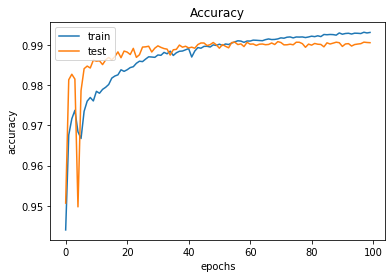

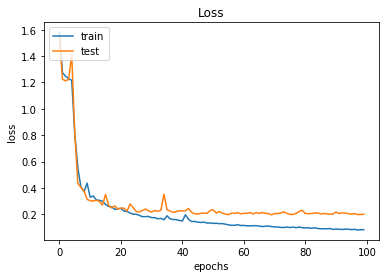

In [0]:
# training and val accuracy
plt.figure()
plt.plot(train_acc_all)
plt.plot(val_acc_all)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')

# training and val loss
plt.figure()
plt.plot(train_loss_all)
plt.plot(val_loss_all)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("{}/loss.png".format("/content"))





## Testing the Validation Accuracy

In [0]:
import pandas as pd
from MAIA_seminar.metrics import DSC_seg, PVE, MHD
dirname = "/content/new_data/Validation_Set/orig/"
data = os.listdir(dirname)
lesion_model.load_state_dict(torch.load('checkpoint.pt'))
metrics = np.zeros((5, 3))
metrics_AVD = np.zeros((5, 3))
metrics_Hausdorff = np.zeros((5, 3))

count = 0
for i in data:
  if i.endswith(".npy") == True:
    if i.endswith("_seg.npy") == False:
      scan = i.split(".")[0]
      test_data = np.load(dirname + i)
      test_data = np.expand_dims(test_data,0)
      test_data = np.squeeze(np.swapaxes(test_data,0,4))
      test_ground = np.load(dirname + scan + "_seg.npy")
      test_ground = np.expand_dims(test_ground,0)
      test_ground = np.expand_dims(test_ground,0)
      test_ground = np.squeeze(np.swapaxes(test_ground,0,4))
      test_ground = np.expand_dims(test_ground,axis=1)

      pred_t0 = np.zeros(test_ground.shape)
      pred_t1 = np.zeros(test_ground.shape)
      pred_t2 = np.zeros(test_ground.shape)
      pred_t3 = np.zeros(test_ground.shape)
      test_data = np.expand_dims(test_data,axis=1)
      test_data = np.expand_dims(test_data,axis=1)


      for j in range (test_data.shape[0]):
        temp = lesion_model(torch.tensor((test_data[j,:,:,:,:])).to(device)).cpu().detach().numpy()
        pred_t0[j,:,:,:] = temp[:,0,:,:] 
        pred_t1[j,:,:,:] = temp[:,1,:,:] * (test_data[j,0,:,:,:] != 0)
        pred_t2[j,:,:,:] = temp[:,2,:,:] * (test_data[j,0,:,:,:] != 0)
        pred_t3[j,:,:,:] = temp[:,3,:,:] * (test_data[j,0,:,:,:] != 0)

      a = pred_t1 > 0.5
      b = pred_t2 > 0.5
      c = pred_t3 > 0.5
      dsc_metric1 = dice_coef( a  ,test_ground ==1)
      dsc_metric2 = dice_coef( b  ,test_ground ==2)
      dsc_metric3 = dice_coef( c  ,test_ground ==3)



      dsc_metric1a = dice_coef(np.greater(pred_t1,pred_t0) * np.greater(pred_t1,pred_t2) * np.greater(pred_t1,pred_t3) ,test_ground ==1)
      dsc_metric2a = dice_coef(np.greater(pred_t2,pred_t0) * np.greater(pred_t2,pred_t1) * np.greater(pred_t2,pred_t3) ,test_ground ==2)
      dsc_metric3a = dice_coef(np.greater(pred_t3,pred_t0) * np.greater(pred_t3,pred_t2) * np.greater(pred_t3,pred_t1) ,test_ground ==3)

      avg1 = PVE(test_ground ==1, a , type='absolute')
      avg2 = PVE(test_ground ==2, b , type='absolute')
      avg3 = PVE(test_ground ==3, c , type='absolute')

      temp = nib.load("/content/Validation_Set/"+scan +"/" + scan  +  ".nii.gz")
      hf1 = MHD(test_ground ==1, a , spacing=temp.header.get_zooms())
      hf2 = MHD(test_ground ==2, b , spacing=temp.header.get_zooms())
      hf3 = MHD(test_ground ==3, c , spacing=temp.header.get_zooms())


      metrics[count] = [dsc_metric1, dsc_metric2, dsc_metric3]
      metrics_AVD[count] = [avg1, avg2, avg3]
      metrics_Hausdorff[count] = [hf1, hf2, hf3]


      print('SCAN:', scan, 'Dice_csf: ', dsc_metric1, 'Dice_gm:', dsc_metric2, 'Dice_wm:', dsc_metric3)
      #print('SCAN:', scan, 'Dice_csf: ', dsc_metric1a, 'Dice_gm:', dsc_metric2a, 'Dice_wm:', dsc_metric3a)
      count +=1


m = pd.DataFrame(metrics, columns=['DSC_CSF', 'DSC_GM', 'DSC_WM'])
m.describe().T





      

SCAN: IBSR_12 Dice_csf:  0.902853308849495 Dice_gm: 0.9361587997055468 Dice_wm: 0.9459199863516164
SCAN: IBSR_13 Dice_csf:  0.886893994211288 Dice_gm: 0.9423683364025458 Dice_wm: 0.9245345493724223
SCAN: IBSR_17 Dice_csf:  0.939509590666403 Dice_gm: 0.9511561125974463 Dice_wm: 0.9362853773062035
SCAN: IBSR_14 Dice_csf:  0.9278813210908593 Dice_gm: 0.9564799406035849 Dice_wm: 0.9506548330423576
SCAN: IBSR_11 Dice_csf:  0.9157899636905316 Dice_gm: 0.9477689127404384 Dice_wm: 0.953576467268623


count      mean       std  ...       50%       75%       max
DSC_CSF    5.0  0.914586  0.020639  ...  0.915790  0.927881  0.939510
DSC_GM     5.0  0.946786  0.007850  ...  0.947769  0.951156  0.956480
DSC_WM     5.0  0.942194  0.011851  ...  0.945920  0.950655  0.953576

[3 rows x 8 columns]

## Average Volumetric

In [0]:
k = pd.DataFrame(metrics_AVD, columns=['AVD_CSF', 'AVD_GM', 'AVD_WM'])
k.describe().T

count      mean       std  ...       50%       75%       max
AVD_CSF    5.0  0.055015  0.060753  ...  0.035134  0.105692  0.132247
AVD_GM     5.0  0.022991  0.016800  ...  0.021256  0.031747  0.046081
AVD_WM     5.0  0.041003  0.024466  ...  0.047210  0.059040  0.059658

[3 rows x 8 columns]

## Hausdorff Distance


In [0]:
l = pd.DataFrame(metrics_Hausdorff, columns=['HD_CSF', 'HD_GM', 'HD_WM'])
l.describe().T

count      mean       std  ...       50%       75%       max
HD_CSF    5.0  0.071870  0.064709  ...  0.046158  0.071917  0.182931
HD_GM     5.0  0.000980  0.001170  ...  0.000509  0.000782  0.003040
HD_WM     5.0  0.002028  0.001576  ...  0.001513  0.002424  0.004581

[3 rows x 8 columns]